## 1. Creation of Synthetic Data Set

In [1]:
import pandas as pd
import numpy as np
import random
from faker import Faker
fake = Faker()

def generate_product_features(category):
    if category == "Electronics":
        return fake.random_element(["Wi-Fi Enabled", "Bluetooth Connectivity", "4K Ultra HD"])
    elif category == "Clothing":
        return fake.random_element(["100% Cotton", "Slim Fit", "UV Protection"])
    elif category == "Furniture":
        return fake.random_element(["Solid Wood", "Leather Upholstery", "Adjustable Shelves"])
    elif category == "Books":
        return fake.random_element(["Bestseller", "Award-Winning", "Hardcover"])
    elif category == "Toys":
        return fake.random_element(["Educational", "Interactive", "Battery-Powered"])
    else:
        return fake.random_element(["Color: Red", "Size: Large", "Weight: Light"])  # Default for unknown categories

# Define the number of rows in the dataset
num_rows = 5000

# Generate synthetic data for the dataset
data = {
    "Date": pd.date_range(start="2010-01-01", periods=num_rows, freq="D"),
    "Day_of_Week": [d.strftime("%A") for d in pd.date_range(start="2010-01-01", periods=num_rows, freq="D")],
    "Month": [d.strftime("%B") for d in pd.date_range(start="2010-01-01", periods=num_rows, freq="D")],
    "Product_ID": [fake.unique.random_int(min=1000, max=9999) for _ in range(num_rows)],
    "Product_Category": [fake.random_element(["Electronics", "Clothing", "Furniture", "Books", "Toys"]) for _ in range(num_rows)],
    "Product_Price": [round(random.uniform(10, 500), 2) for _ in range(num_rows)],
    "Product_Features": [],
    "Historical_Sales_Quantity": [random.randint(1, 100) for _ in range(num_rows)],
    "Historical_Sales_Revenue": [round(random.uniform(100, 5000), 2) for _ in range(num_rows)],
    "Current_Inventory_Level": [random.randint(0, 200) for _ in range(num_rows)],
    "Reorder_Point": [random.randint(10, 50) for _ in range(num_rows)],
    "Lead_Time": [random.randint(1, 10) for _ in range(num_rows)],
    "Promotion_Type": [fake.random_element(["Discount", "Bundle", "None"]) for _ in range(num_rows)],
    "Customer_Segmentation": [fake.random_element(["Segment1", "Segment2", "Segment3"]) for _ in range(num_rows)],
    "Economic_Indicator": [round(random.uniform(0.5, 2.5), 2) for _ in range(num_rows)],
    "Supplier_Performance": [round(random.uniform(0.1, 0.9), 2) for _ in range(num_rows)],
    "Customer_Rating": [round(random.uniform(1, 5), 2) for _ in range(num_rows)],
    "Stock_Available": [],    # Placeholder for Stock_Available
    "Sales_Quantity": [],     # Placeholder for Sales_Quantity
    "Promotion_Flag": [],     # Placeholder for Promotion_Flag
    "Sales_Revenue": []       # Placeholder for Sales_Revenue
}

# Create a proportional relationship for Stock_Available with Product_Price
data["Stock_Available"] = [int(price * random.uniform(0.5, 1.5)) for price in data["Product_Price"]]

# Create an inverse proportional relationship for Sales_Quantity with Stock_Available
data["Sales_Quantity"] = [int(stock / 10) + random.randint(-10, 10) for stock in data["Stock_Available"]]

# Create a relationship between Sales_Revenue and Historical_Sales_Revenue
data["Sales_Revenue"] = [round(revenue * random.uniform(0.8, 1.2)) for revenue in data["Historical_Sales_Revenue"]]

# Create a relationship between Current_Inventory_Level and Historical_Sales_Quantity
data["Current_Inventory_Level"] = [inventory - quantity for inventory, quantity in zip(data["Current_Inventory_Level"], data["Historical_Sales_Quantity"])]

# Create a relationship between Reorder_Point and Lead_Time
data["Reorder_Point"] = [lead_time * random.uniform(0.5, 1.5) for lead_time in data["Lead_Time"]]

# Create a relationship between Economic_Indicator and Product_Price
data["Product_Price"] = [price * indicator for price, indicator in zip(data["Product_Price"], data["Economic_Indicator"])]

# Create Promotion_Flag based on Promotion_Type
data["Promotion_Flag"] = [1 if promotion_type != "None" else 0 for promotion_type in data["Promotion_Type"]]

# Create a relationship between Customer_Rating and Sales_Revenue
data["Sales_Revenue"] = [round(revenue * (rating / 5)) for revenue, rating in zip(data["Sales_Revenue"], data["Customer_Rating"])]

# Create a relationship between Historical_Sales_Quantity and Customer_Rating
data["Historical_Sales_Quantity"] = [int(100 * rating) + random.randint(-20, 20) for rating in data["Customer_Rating"]]

# Create a relationship between Supplier_Performance and Historical_Sales_Revenue
data["Historical_Sales_Revenue"] = [revenue * supplier_performance for revenue, supplier_performance in zip(data["Historical_Sales_Revenue"], data["Supplier_Performance"])]

# Create a relationship between Product_Price and Product_Category
price_multiplier = {
    "Electronics": 1.2,
    "Clothing": 1.0,
    "Furniture": 1.5,
    "Books": 0.8,
    "Toys": 1.1
}
data["Product_Price"] = [price * price_multiplier[category] for price, category in zip(data["Product_Price"], data["Product_Category"])]

data["Product_Features"] = [generate_product_features(category) for category in data["Product_Category"]]

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Save the dataset to a CSV file
df.to_csv("synthetic_dataset_final.csv", index=False)


        Date Day_of_Week    Month  Product_ID Product_Category  Product_Price  \
0 2010-01-01      Friday  January        4615         Clothing      620.94240   
1 2010-01-02    Saturday  January        2805        Furniture      607.92480   
2 2010-01-03      Sunday  January        2297            Books      551.21920   
3 2010-01-04      Monday  January        9944         Clothing       24.09200   
4 2010-01-05     Tuesday  January        6502             Toys      533.03943   

     Product_Features  Historical_Sales_Quantity  Historical_Sales_Revenue  \
0         100% Cotton                        368                   84.4702   
1  Adjustable Shelves                        152                  775.5825   
2       Award-Winning                        339                  476.2786   
3            Slim Fit                        153                 1134.4482   
4     Battery-Powered                        408                 1960.4096   

   Current_Inventory_Level  ...  Lead_Time  

## 2. Preprocessing of Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data into a pandas DataFrame
data = pd.read_csv('synthetic_dataset_final.csv') 

# Step 1: Handle Missing Data
# Drop rows with missing values for simplicity
data.dropna(inplace=True)

# Step 2: Data Type Conversion
data['Date'] = pd.to_datetime(data['Date'])
data

Date Day_of_Week      Month  Product_ID Product_Category  \
0    2010-01-01      Friday    January        4615         Clothing   
1    2010-01-02    Saturday    January        2805        Furniture   
2    2010-01-03      Sunday    January        2297            Books   
3    2010-01-04      Monday    January        9944         Clothing   
4    2010-01-05     Tuesday    January        6502             Toys   
...         ...         ...        ...         ...              ...   
4995 2023-09-05     Tuesday  September        6342      Electronics   
4996 2023-09-06   Wednesday  September        5743      Electronics   
4997 2023-09-07    Thursday  September        1328            Books   
4998 2023-09-08      Friday  September        4024             Toys   
4999 2023-09-09    Saturday  September        8662            Books   

      Product_Price        Product_Features  Historical_Sales_Quantity  \
0         620.94240             100% Cotton                        368   
1         607.92480      Adjustable Shelves                        152   
2         551.21920           Award-Winning                        339   
3          24.09200                Slim Fit                        153   
4         533.03943         Battery-Powered                        408   
...             ...                     ...                        ...   
4995      115.74780  Bluetooth Connectivity                        406   
4996       75.47580           Wi-Fi Enabled                        435   
4997      173.16192               Hardcover                        219   
4998       53.72202         Battery-Powered                        447   
4999      466.88576           Award-Winning                        394   

      Historical_Sales_Revenue  Current_Inventory_Level  ...  Lead_Time  \
0                      84.4702                      108  ...          9   
1                     775.5825                      148  ...          3   
2                     476.2786                      -43  ...          1   
3                    1134.4482                       69  ...          1   
4                    1960.4096                       45  ...          6   
...                        ...                      ...  ...        ...   
4995                 2559.6845                      -93  ...          9   
4996                 1609.9720                      -18  ...          9   
4997                 1792.6829                       18  ...          2   
4998                  348.1850                       56  ...          2   
4999                 1465.1715                       -2  ...          6   

      Promotion_Type Customer_Segmentation Economic_Indicator  \
0           Discount              Segment1               1.44   
1             Bundle              Segment2               0.84   
2           Discount              Segment2               1.40   
3           Discount              Segment2               1.52   
4           Discount              Segment1               2.19   
...              ...                   ...                ...   
4995        Discount              Segment3               2.45   
4996          Bundle              Segment1               0.81   
4997          Bundle              Segment2               0.61   
4998          Bundle              Segment1               1.38   
4999          Bundle              Segment3               1.21   

      Supplier_Performance  Customer_Rating  Stock_Available  Sales_Quantity  \
0                     0.19             3.54              532              55   
1                     0.51             1.54              569              56   
2                     0.14             3.54              447              53   
3                     0.38             1.56               21              -7   
4                     0.64             4.07              252              34   
...                    ...              ...              ...             ...   
4995                  0.89 

In [3]:
# Step 3: Encoding Categorical Data
day_mapping = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7
}

# Map day names to numbers
data["Day_of_Week"] = data["Day_of_Week"].map(day_mapping)

month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

# Map month names to numbers
data["Month"] = data["Month"].map(month_mapping)
data.head(10)
# Now, the "Month" column contains numeric values from 1 to 12.


Date  Day_of_Week  Month  Product_ID Product_Category  Product_Price  \
0 2010-01-01            5      1        4615         Clothing      620.94240   
1 2010-01-02            6      1        2805        Furniture      607.92480   
2 2010-01-03            7      1        2297            Books      551.21920   
3 2010-01-04            1      1        9944         Clothing       24.09200   
4 2010-01-05            2      1        6502             Toys      533.03943   
5 2010-01-06            3      1        8584      Electronics      202.25160   
6 2010-01-07            4      1        8732        Furniture      241.12455   
7 2010-01-08            5      1        4958         Clothing      640.31040   
8 2010-01-09            6      1        3652             Toys      281.82990   
9 2010-01-10            7      1        3083      Electronics      569.51028   

         Product_Features  Historical_Sales_Quantity  \
0             100% Cotton                        368   
1      Adjustable Shelves                        152   
2           Award-Winning                        339   
3                Slim Fit                        153   
4         Battery-Powered                        408   
5             4K Ultra HD                        287   
6      Adjustable Shelves                        350   
7             100% Cotton                        404   
8         Battery-Powered                        318   
9  Bluetooth Connectivity                        488   

   Historical_Sales_Revenue  Current_Inventory_Level  ...  Lead_Time  \
0                   84.4702                      108  ...          9   
1                  775.5825                      148  ...          3   
2                  476.2786                      -43  ...          1   
3                 1134.4482                       69  ...          1   
4                 1960.4096                       45  ...          6   
5                   53.5378                      -47  ...          1   
6                  656.5764                       20  ...          4   
7                 1536.5340                       45  ...          7   
8                 1795.2680                      128  ...          1   
9                  479.5089                       47  ...         10   

   Promotion_Type Customer_Segmentation Economic_Indicator  \
0        Discount              Segment1               1.44   
1          Bundle              Segment2               0.84   
2        Discount              Segment2               1.40   
3        Discount              Segment2               1.52   
4        Discount              Segment1               2.19   
5        Discount              Segment3               1.22   
6        Discount              Segment3               1.93   
7            None              Segment3               2.16   
8          Bundle              Segment2               1.23   
9        Discount              Segment3               1.41   

   Supplier_Performance  Customer_Rating  Stock_Available  Sales_Quantity  \
0                  0.19             3.54              532              55   
1                  0.51             1.54              569              56   
2                  0.14             3.54              447              53   
3                  0.38             1.56               21              -7   
4                  0.64             4.07              252              34   
5                  0.41             2.93               84              12   
6                  0.46             3.42               50              -5   
7                  0.36             4.23              149              15   
8                  0.68             3.02              239              25   
9                  0.13             4.71              469              42   

   Promotion_Flag  Sales_Revenue  
0               1            323  
1               1            414  
2               1           2782  
3               1            919  
4          

In [4]:

# Step 5: Scale or Normalize Numerical Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = ['Product_Price', 'Historical_Sales_Quantity', 'Historical_Sales_Revenue', 'Current_Inventory_Level', 'Reorder_Point', 'Lead_Time', 'Economic_Indicator', 'Supplier_Performance', 'Customer_Rating', 'Stock_Available', 'Sales_Quantity', 'Sales_Revenue']

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Step 8: Normalize Date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day_of_Week'] = data['Date'].dt.dayofweek

# Step 9: Drop Unnecessary Columns
columns_to_drop = ['Product_Features']  # Add more columns to drop as needed
data.drop(columns=columns_to_drop, inplace=True)

# Step 10: saving the file in a separate csv for proper file reference
data.to_csv('preprocessed_data.csv', index=False)  

## 3. Importing data from preprocessing.csv

In [5]:
df=pd.read_csv("preprocessed_data.csv")
df.head(10)

Date  Day_of_Week  Month  Product_ID Product_Category  Product_Price  \
0  2010-01-01            4      1        4615         Clothing       0.340335   
1  2010-01-02            5      1        2805        Furniture       0.333136   
2  2010-01-03            6      1        2297            Books       0.301777   
3  2010-01-04            0      1        9944         Clothing       0.010266   
4  2010-01-05            1      1        6502             Toys       0.291723   
5  2010-01-06            2      1        8584      Electronics       0.108792   
6  2010-01-07            3      1        8732        Furniture       0.130289   
7  2010-01-08            4      1        4958         Clothing       0.351046   
8  2010-01-09            5      1        3652             Toys       0.152800   
9  2010-01-10            6      1        3083      Electronics       0.311892   

   Historical_Sales_Quantity  Historical_Sales_Revenue  \
0                   0.653670                  0.016314   
1                   0.158257                  0.172115   
2                   0.587156                  0.104641   
3                   0.160550                  0.253016   
4                   0.745413                  0.439217   
5                   0.467890                  0.009341   
6                   0.612385                  0.145287   
7                   0.736239                  0.343661   
8                   0.538991                  0.401988   
9                   0.928899                  0.105370   

   Current_Inventory_Level  Reorder_Point  ...  Promotion_Type  \
0                 0.696970       0.310608  ...        Discount   
1                 0.831650       0.075326  ...          Bundle   
2                 0.188552       0.063809  ...        Discount   
3                 0.565657       0.024414  ...        Discount   
4                 0.484848       0.218401  ...        Discount   
5                 0.175084       0.063304  ...        Discount   
6                 0.400673       0.106324  ...        Discount   
7                 0.484848       0.378181  ...            None   
8                 0.764310       0.061332  ...          Bundle   
9                 0.491582       0.881422  ...        Discount   

  Customer_Segmentation Economic_Indicator  Supplier_Performance  \
0              Segment1              0.470                0.1125   
1              Segment2              0.170                0.5125   
2              Segment2              0.450                0.0500   
3              Segment2              0.510                0.3500   
4              Segment1              0.845                0.6750   
5              Segment3              0.360                0.3875   
6              Segment3              0.715                0.4500   
7              Segment3              0.830                0.3250   
8              Segment2              0.365                0.7250   
9              Segment3              0.455                0.0375   

   Customer_Rating  Stock_Available  Sales_Quantity  Promotion_Flag  \
0           0.6350         0.722908        0.727273               1   
1           0.1350         0.773663        0.738636               1   
2           0.6350         0.606310        0.704545               1   
3           0.1400         0.021948        0.022727               1   
4           0.7675         0.338820        0.488636               1   
5           0.4825         0.108368        0.238636               1   
6           0.6050         0.061728        0.045455               1   
7           0.8075         0.197531        0.272727               0   
8           0.5050         0.320988        0.386364               1   
9           0.9275         0.636488        0.579545               1   

   Sales_Revenue  Year  
0       0.053652  2010  
1       0.069980  2010  
2       0.494886  2010  
3       0.160596  2010  
4       0.427059  2010  
5       0.010766  2010  
6       0.205634  2010  
7       0.557868  20

## 4. Visualisations

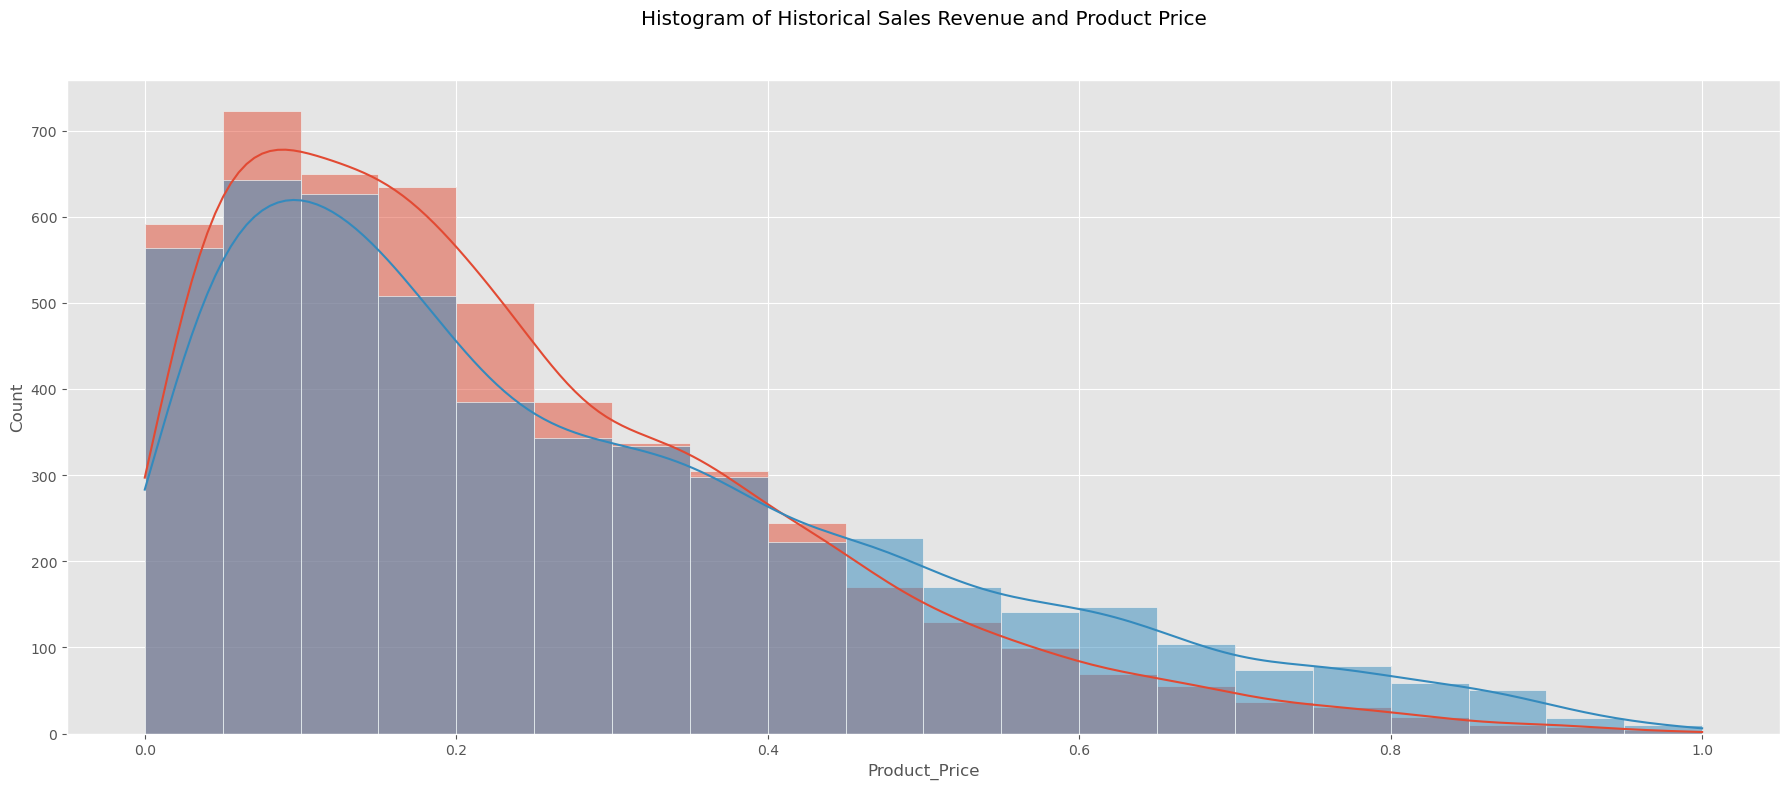

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.available
plt.style.use('ggplot')
numerical_columns = ["Product_Price", "Historical_Sales_Revenue"]

plt.figure(figsize=(18, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.plot(1, len(numerical_columns), i)
    sns.histplot(df[col], bins=20, kde=True)

plt.title(f'Histogram of Historical Sales Revenue and Product Price',pad=40)
plt.tight_layout()

print()
plt.show()

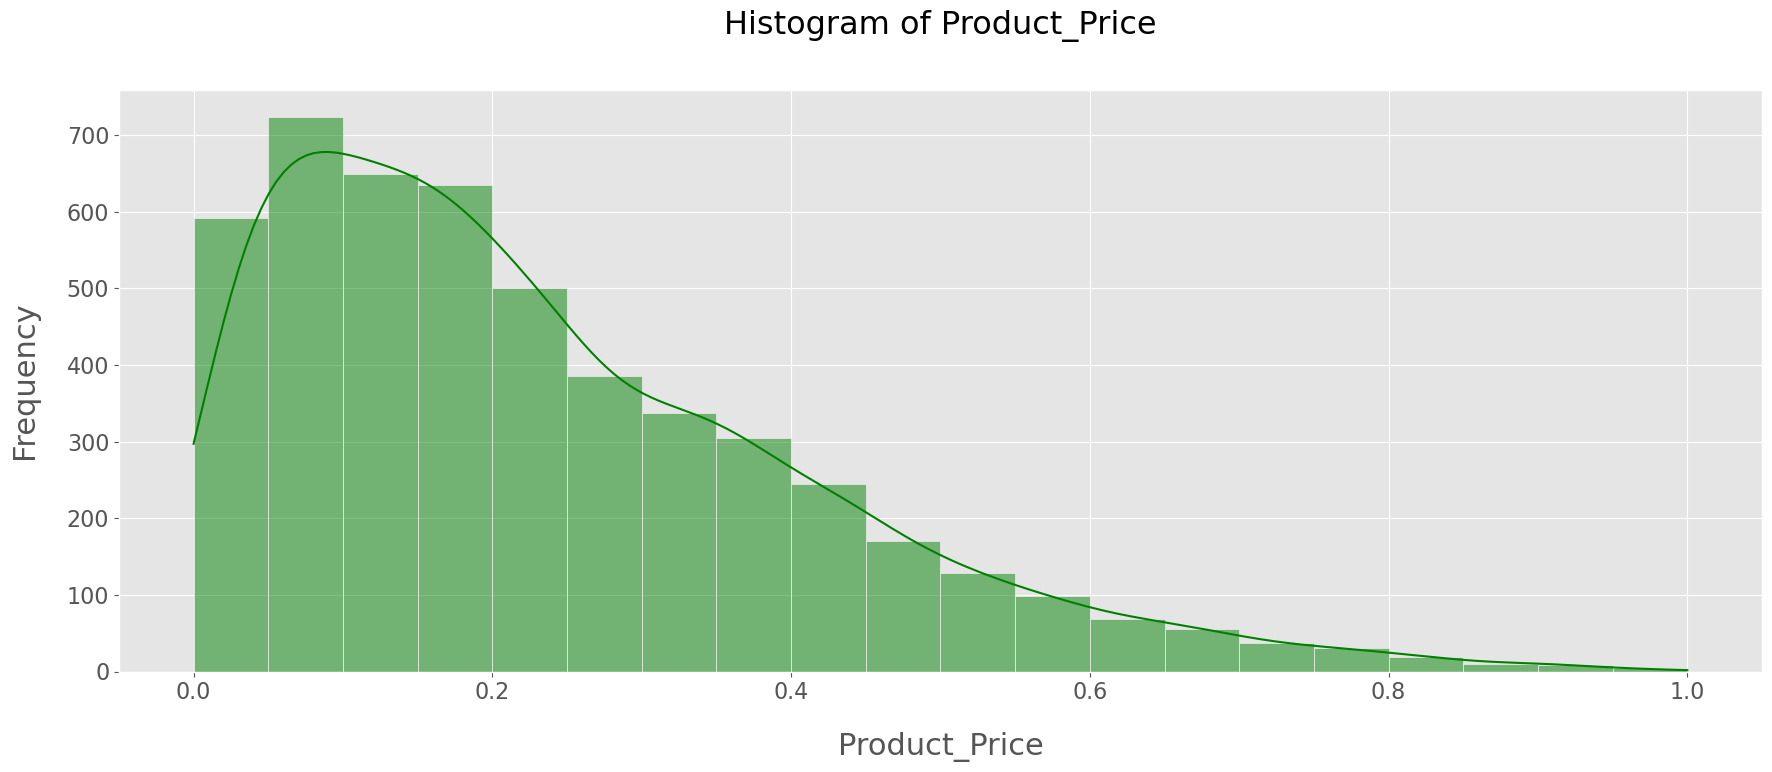

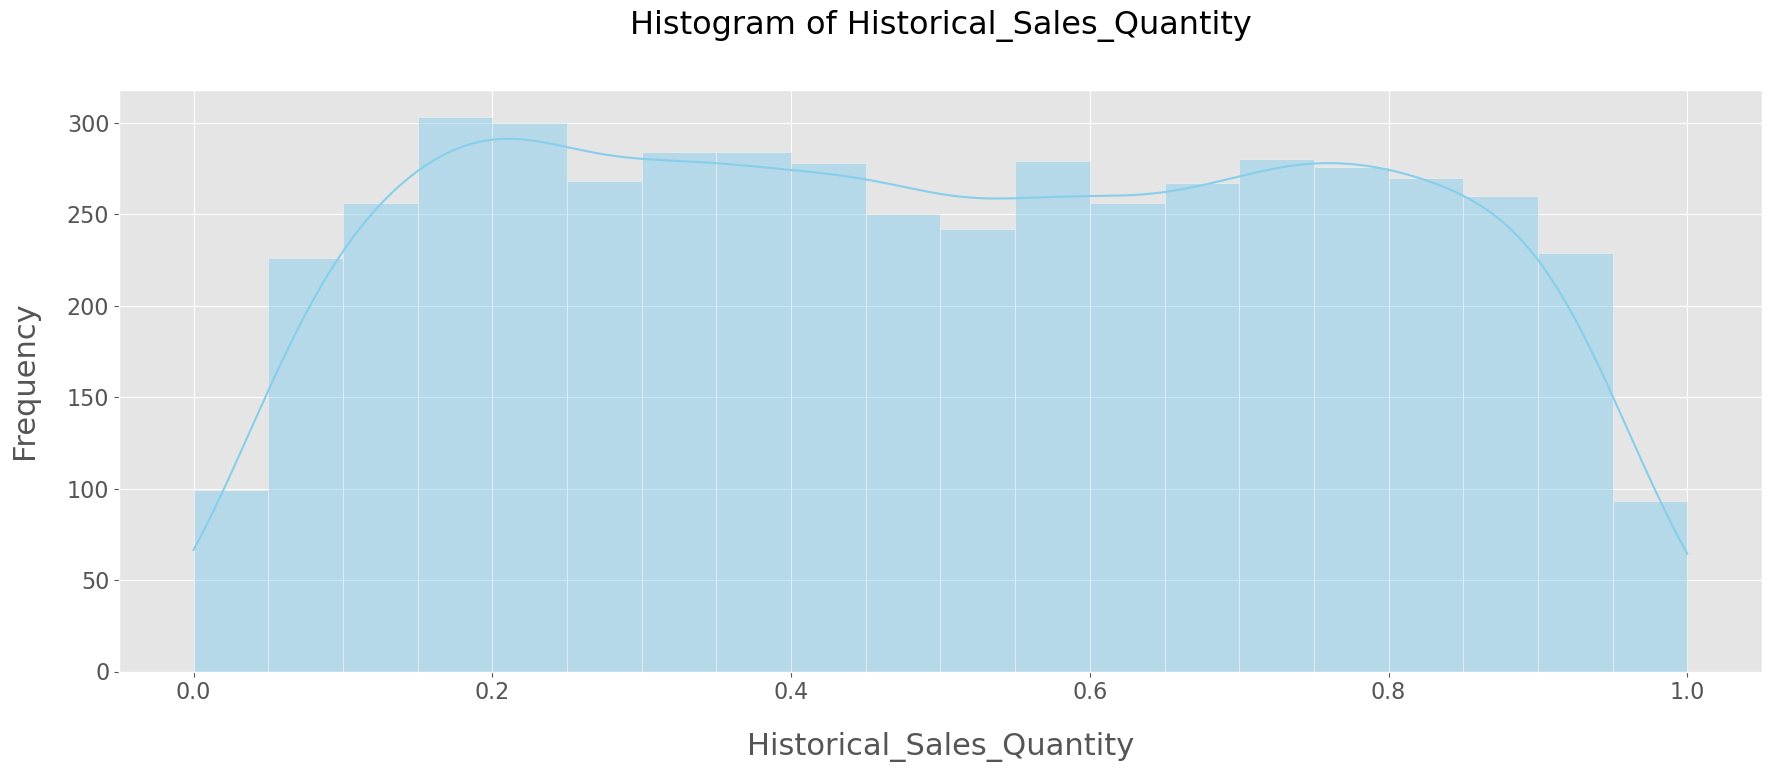

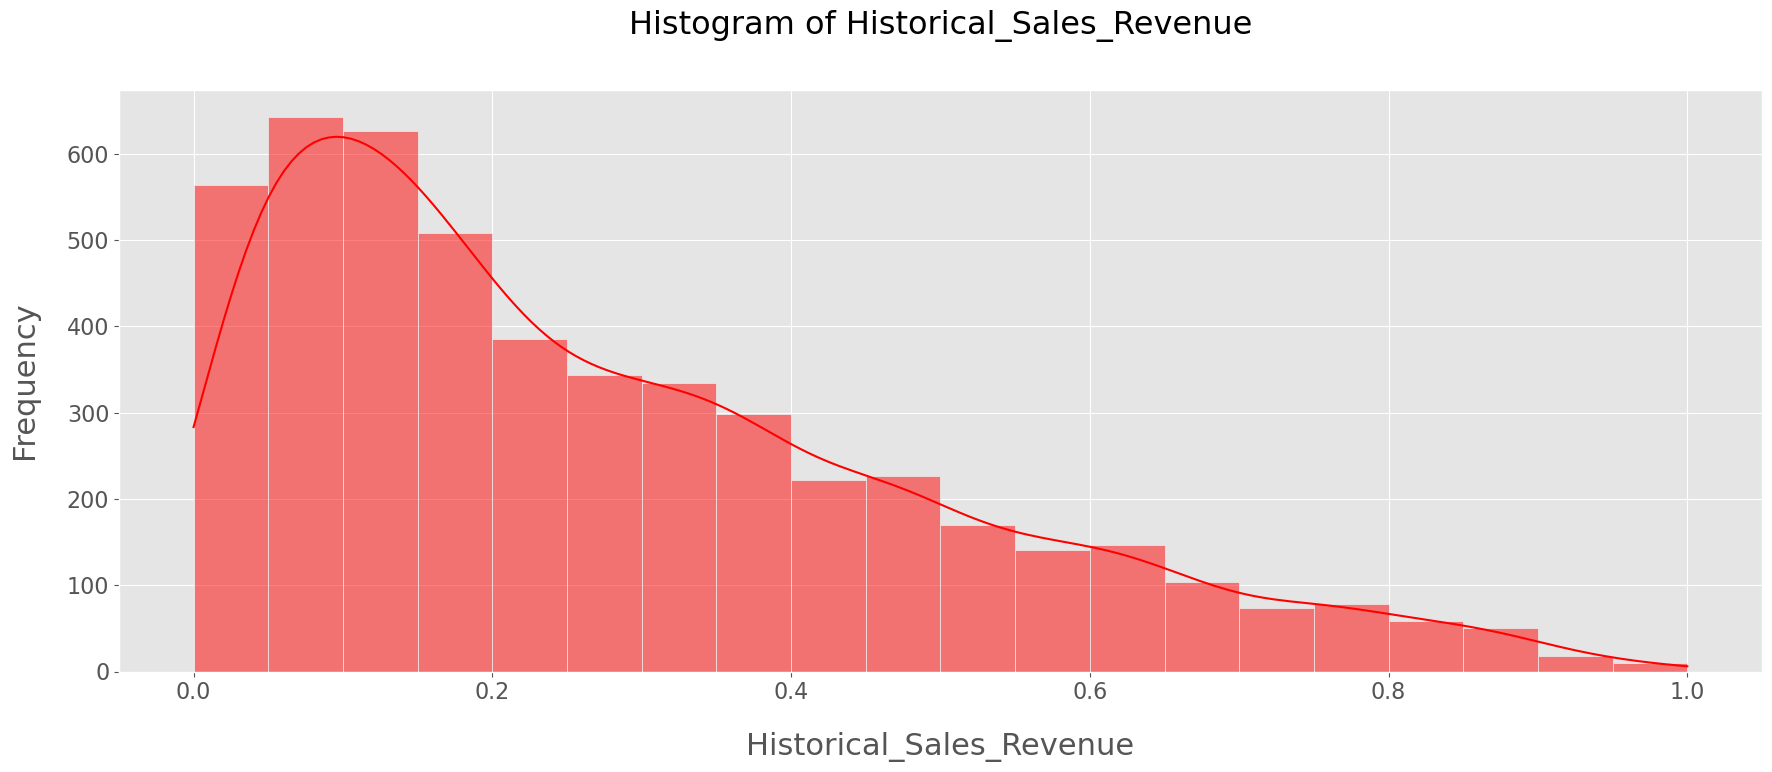

In [10]:
plt.rcParams.update({'font.size': 16})

histogram_color = ['green','skyblue','red']

numerical_columns = ["Product_Price", "Historical_Sales_Quantity", "Historical_Sales_Revenue"]
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(18, 8))
    sns.histplot(df[col], bins=20, kde=True,color=histogram_color[i])
    plt.title(f'Histogram of {col}',pad=40)
    plt.xlabel(col,fontsize=22,labelpad=20)
    plt.ylabel('Frequency',fontsize=22,labelpad=20)
    plt.tight_layout()
    print()
    plt.show()

### Inference on histogram 1 (Product price - Frequency)
* The inventory is mostly made up of low-priced items. The peak of the distribution is around 400, which suggests that most of the items in the inventory are priced below 400.

* There are fewer high-priced items in the inventory. 

* The tail of the distribution extends to 1000 which suggests that there are a few items in the inventory that are priced above 1000.The inventory is not evenly distributed across price ranges. 

* There are more items in the lower price ranges than in the higher price ranges.


### Inference on histogram 2 (Historical_Sales_Quantity - Frequency)
* The company has sold a relatively consistent number of units over time. The distribution is fairly symmetric, with no major outliers. This suggests that the company has not experienced any major fluctuations in sales volume.
* The company has sold more units in the past few years. The peak of the distribution is around 2020, which suggests that the company has sold more units in recent years than in previous years.
* The company has sold a wide range of unit quantities. The tail of the distribution extends to 500 units, which suggests that the company has sold a few units in large quantities.

### Inference on histogram 3 (Historical_Sales_Revenue - Frequency)
* The company has never sold more than 1,000,000 in a single year.
* The company has sold more than 4,00,00,000 in 6 of the 8 years represented in the histogram.



Overall, the histogram shows that the company has a relatively stable sales revenue over time. However, there is a small number of years where the company has sold significantly more revenue than usual. This could be due to a number of factors, such as new product launches, marketing campaigns, or changes in the economy.

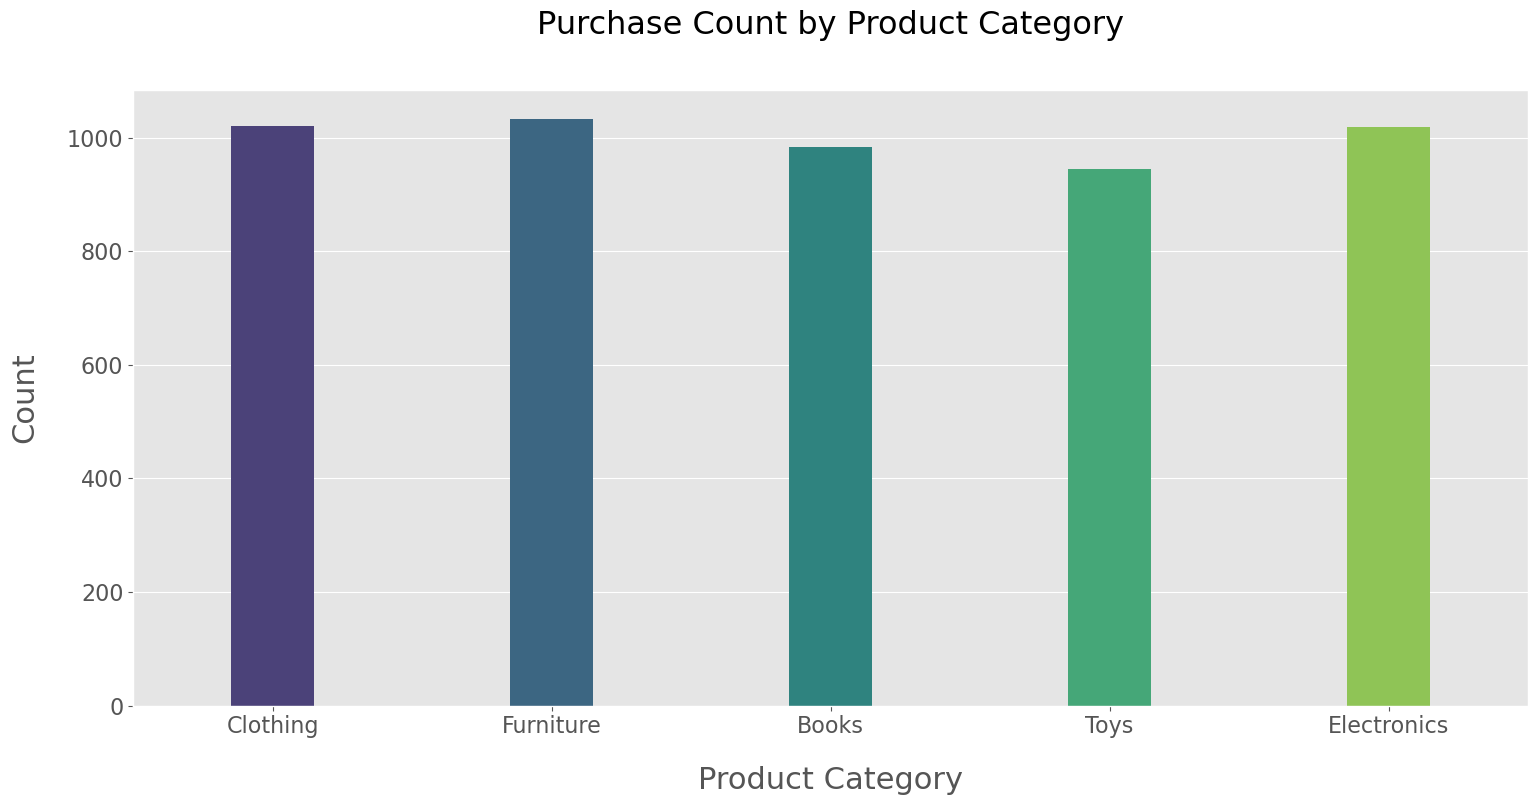

In [11]:
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Product_Category', palette='viridis',dodge=0.6,width=0.3)  
plt.title('Purchase Count by Product Category',pad=40)
plt.xlabel('Product Category',fontsize=22,labelpad=20)
plt.ylabel('Count',fontsize=22,labelpad=20)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
print()
plt.show()

### Inference on Barplot 1 (Product Category - Count)
* The Books category is more popular than the other categories.
* The Toys and Furniture categories are about equally popular.
* The Clothing category is the least popular category.
* There is a small number of purchases in the Electronics category.

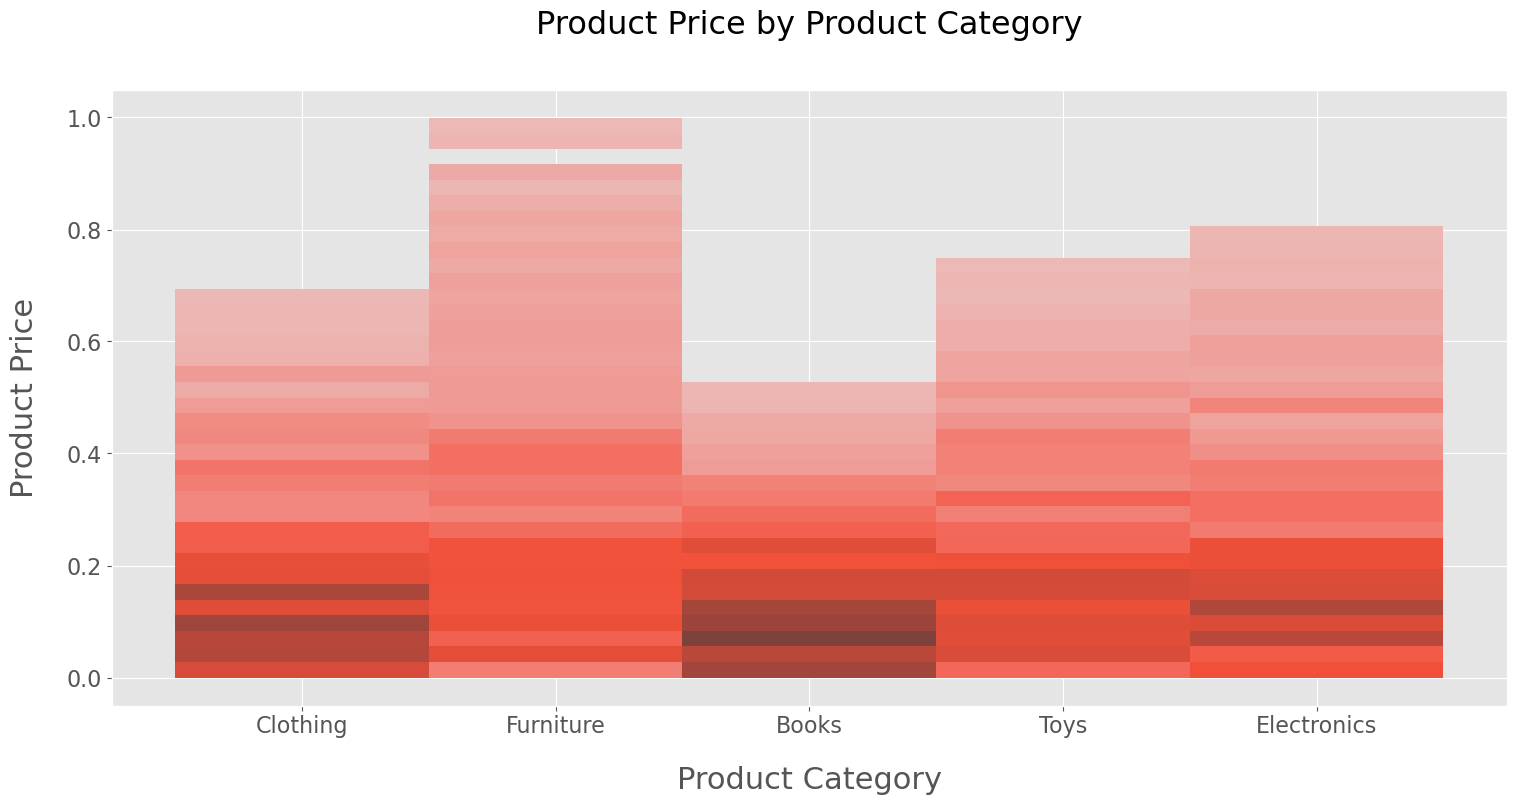

In [12]:
plt.figure(figsize=(18,8))
sns.histplot(data=df,x='Product_Category',y='Product_Price',kde=True)
plt.xlabel('Product Category',fontsize=22,labelpad=20)
plt.ylabel('Product Price',fontsize=22,labelpad=20)
plt.title('Product Price by Product Category',pad=40)
print()
plt.show()

### Inference on histogram 4 (Product Category - Product Price)
* The Electronics category is the most expensive category.
* The Toys and Furniture categories are about equally expensive.
* The Books category is less expensive than the other categories.
* The Clothing category is the least expensive category.

we can also infer that since the price of the book is lesser than that of the price of all the available goods it could be one of the reasons why it is popular in the store.

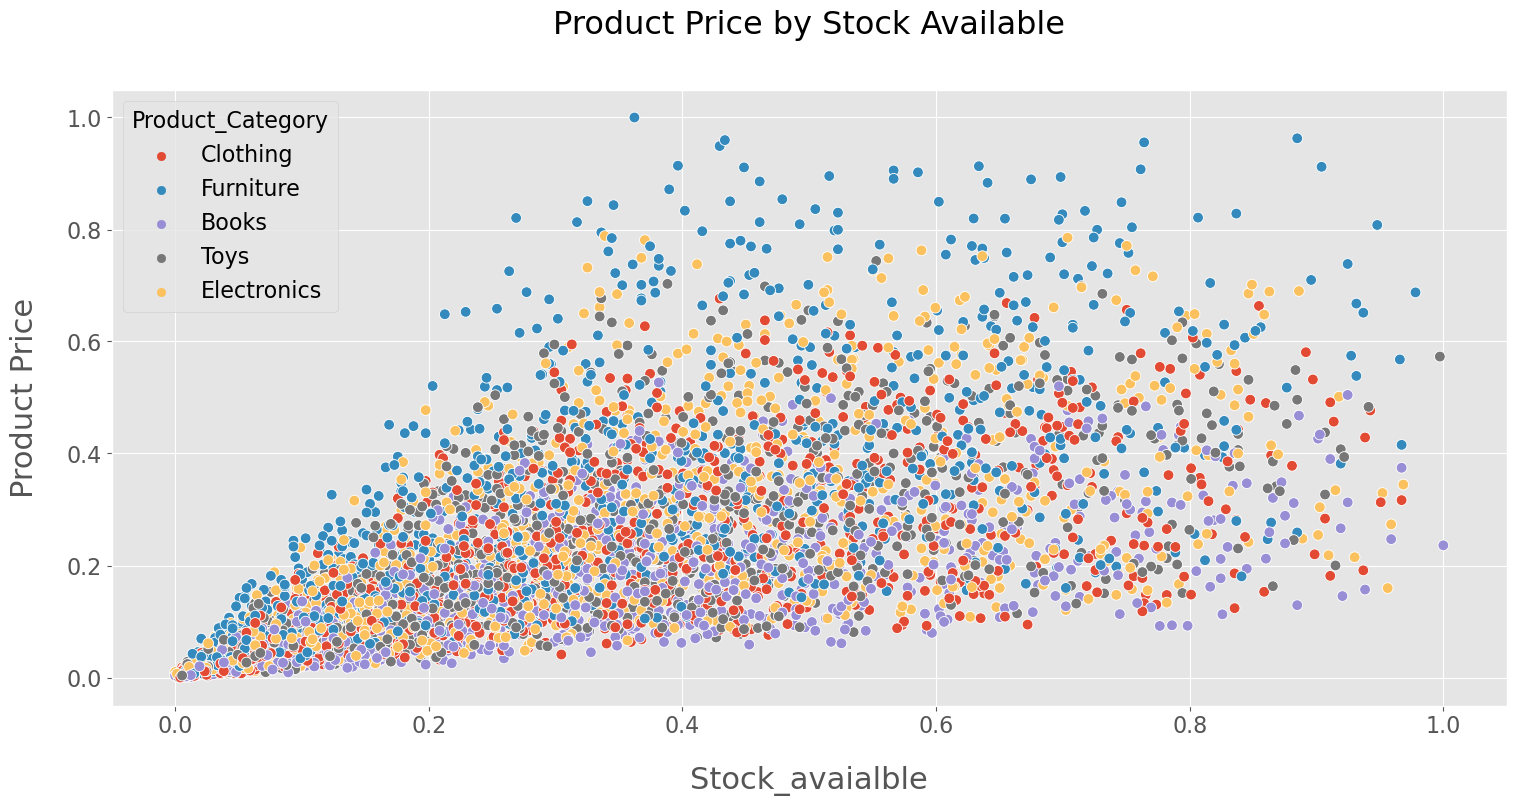

In [13]:
#stock available vs Product Price
plt.figure(figsize=(18,8))
sns.scatterplot(data=df, x='Stock_Available', y='Product_Price', hue='Product_Category', s=60)
plt.xlabel('Stock_avaialble',fontsize=22,labelpad=20)
plt.ylabel('Product Price',fontsize=22,labelpad=20)
plt.title('Product Price by Stock Available',pad=40)
print()
plt.show()

### Inference on ScatterPlot 1 (Product Price - Stock Available)
* The scatter plot shows that there is a positive correlation between product price and product category. This means that, in general, products in higher-priced categories are also more likely to be in stock. However, there are some exceptions to this trend. For example, some products in the Electronics category are not in stock, and some products in the Clothing category are in stock.

* The scatter plot also shows that there is a lot of variation in the price of products within each category. For example, there are some products in the Toys category that are very expensive, and some products that are very cheap. This suggests that there are many factors that can affect the price of a product, such as the brand, the quality, and the features.

* The stock availability of products also varies within each category. For example, some products in the Furniture category are in stock, and some are not. This suggests that the stock availability of a product can depend on a number of factors, such as the popularity of the product, the time of year, and the supply chain.

Overall, the scatter plot shows that there is a positive correlation between product price and product category. However, there is also a lot of variation in the price of products within each category

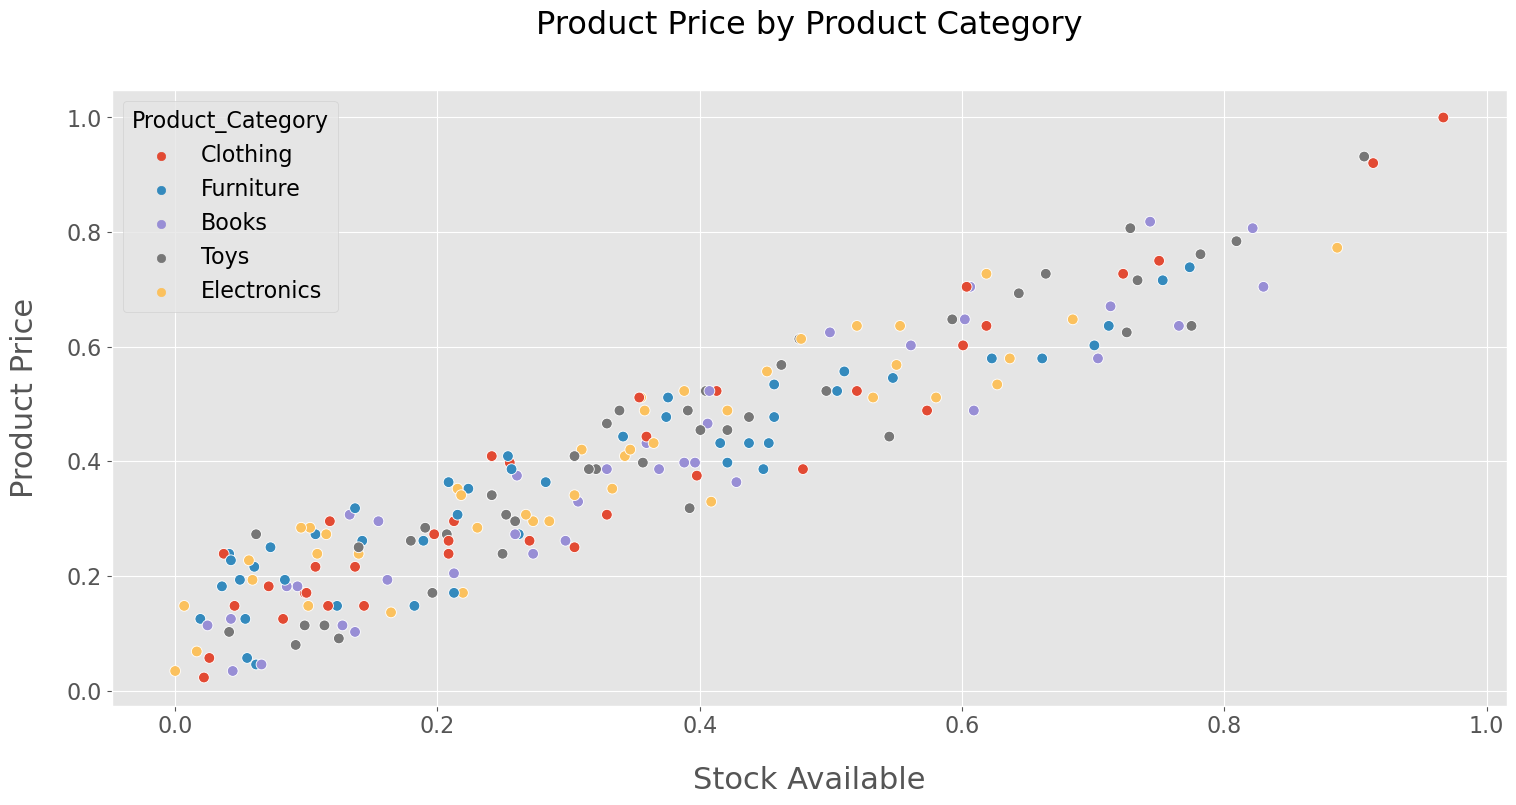

In [14]:
#stock available vs sales quantity
plt.figure(figsize=(18,8))
sns.scatterplot(data=df[:200], x='Stock_Available', y='Sales_Quantity', hue='Product_Category', s=60)
plt.xlabel('Stock Available',fontsize=22,labelpad=20)
plt.ylabel('Product Price',fontsize=22,labelpad=20)
plt.title('Product Price by Product Category',pad=40)
print()
plt.show()

### Inference on ScatterPlot 2 (Product Price vs Stock Available)
* Products in higher-priced categories are more likely to be in stock. This is supported by the fact that the points in the upper right corner of the scatter plot (which represent products in higher-priced categories) are more likely to be blue (indicating that they are in stock).
* There is a lot of variation in the price of products within each category. This is supported by the fact that there are points of all colors (indicating different stock availability statuses) in each of the four quadrants of the scatter plot.
* The stock availability of products can depend on a number of factors, such as the popularity of the product, the time of year, and the supply chain. This is supported by the fact that there are some products in each category that are in stock and some that are not. The specific factors that affect the stock availability of a particular product will vary depending on the product.

In [15]:
#Graph that's yet to be drawn
#relationship between Reorder_Point and Lead_Time
#relationship between Economic_Indicator and Product_Price


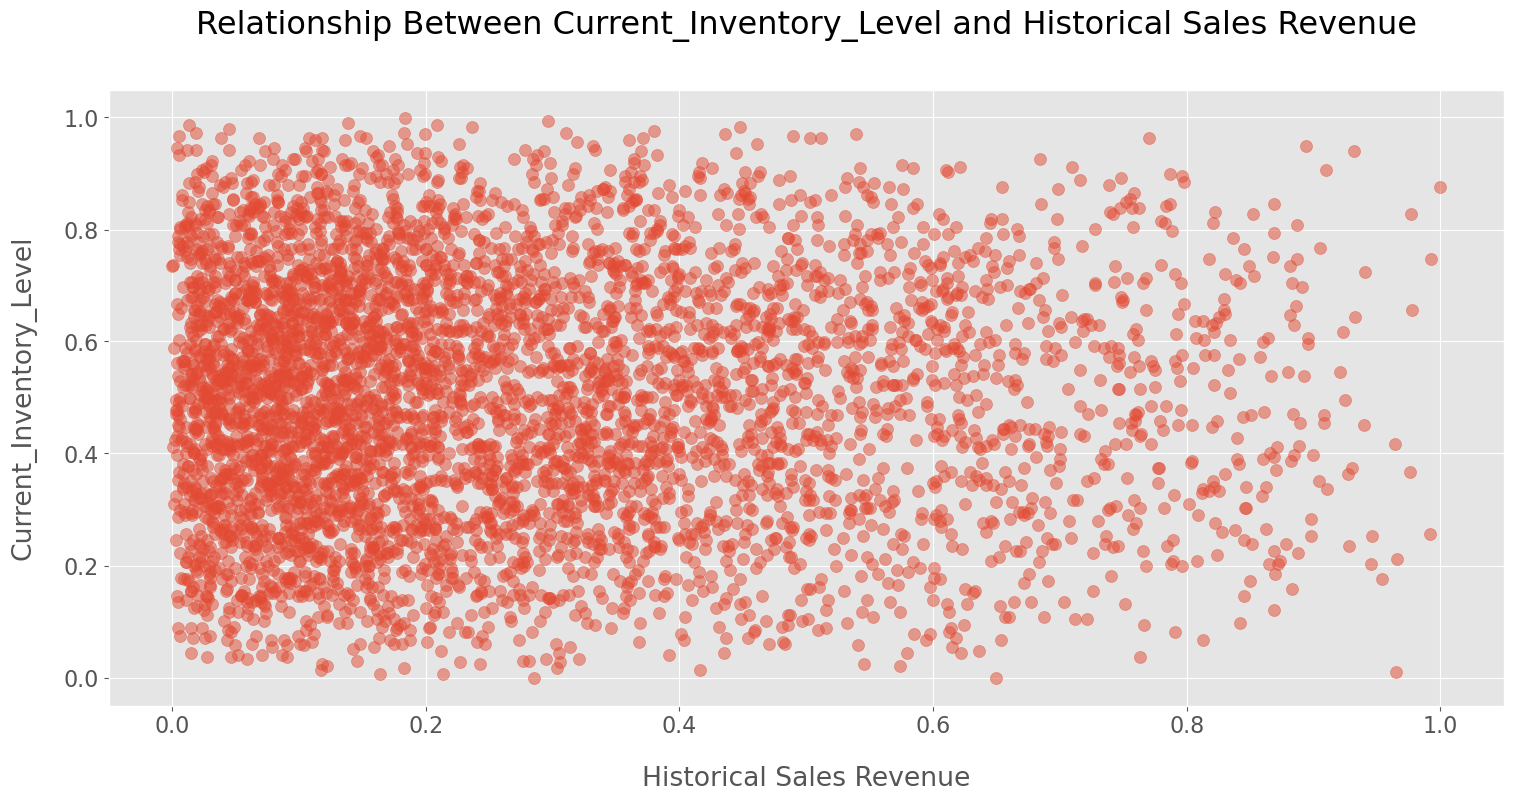

In [16]:
#Current Inventory Level vs Historical Sales Revenue
plt.figure(figsize=(18, 8))  
plt.scatter(df['Historical_Sales_Revenue'], df['Current_Inventory_Level'], alpha=0.5,s=75)  # alpha controls transparency
plt.xlabel('Historical Sales Revenue',labelpad=20)
plt.ylabel('Current_Inventory_Level',labelpad=20)
plt.title('Relationship Between Current_Inventory_Level and Historical Sales Revenue',pad=40)
print()
plt.show()

### Inference on ScatterPlot 3 (Current Inventory Level vs Historical Sales)
The graph shows that the inventory level is higher than the historical sales revenue. This is interesting because it suggests that the company may be overstocking products. This could be due to a number of factors, such as:

* The company may be forecasting demand incorrectly.
* The company may be slow to react to changes in demand.
* The company may be holding onto products that are no longer selling well.

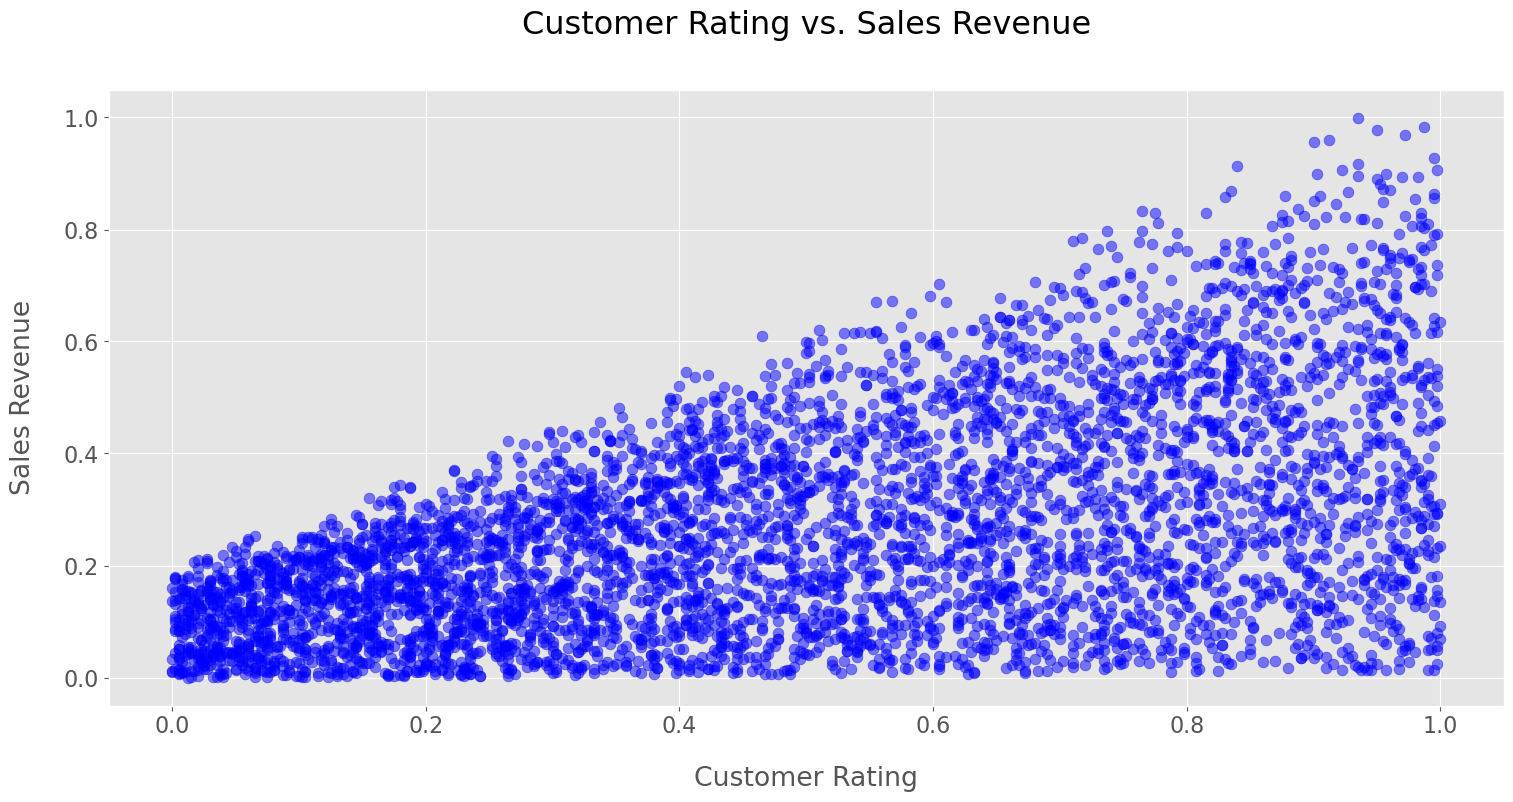

In [17]:
#Customer Rating vs Sales Revenue
plt.figure(figsize=(18, 8))
plt.scatter(df['Customer_Rating'], df['Sales_Revenue'], alpha=0.5, color='blue',s=60)
plt.xlabel('Customer Rating', labelpad=20)
plt.ylabel('Sales Revenue', labelpad=20)
plt.title('Customer Rating vs. Sales Revenue', pad=40)
print()
plt.show()

### Inference on ScatterPlot 4 (Customer Rating vs Sales Revenue)
There is a positive correlation between customer rating and sales revenue. This means that as the customer rating increases, the sales revenue also increases. However, the correlation is not very strong, as there are a few points that do not follow the trend.


* The customer rating may not be the only factor that influences sales revenue. Other factors, such as the price of the product or the availability of the product, may also be important.
* The data may be incomplete or inaccurate.
* The correlation may be weaker for certain products or in certain markets.

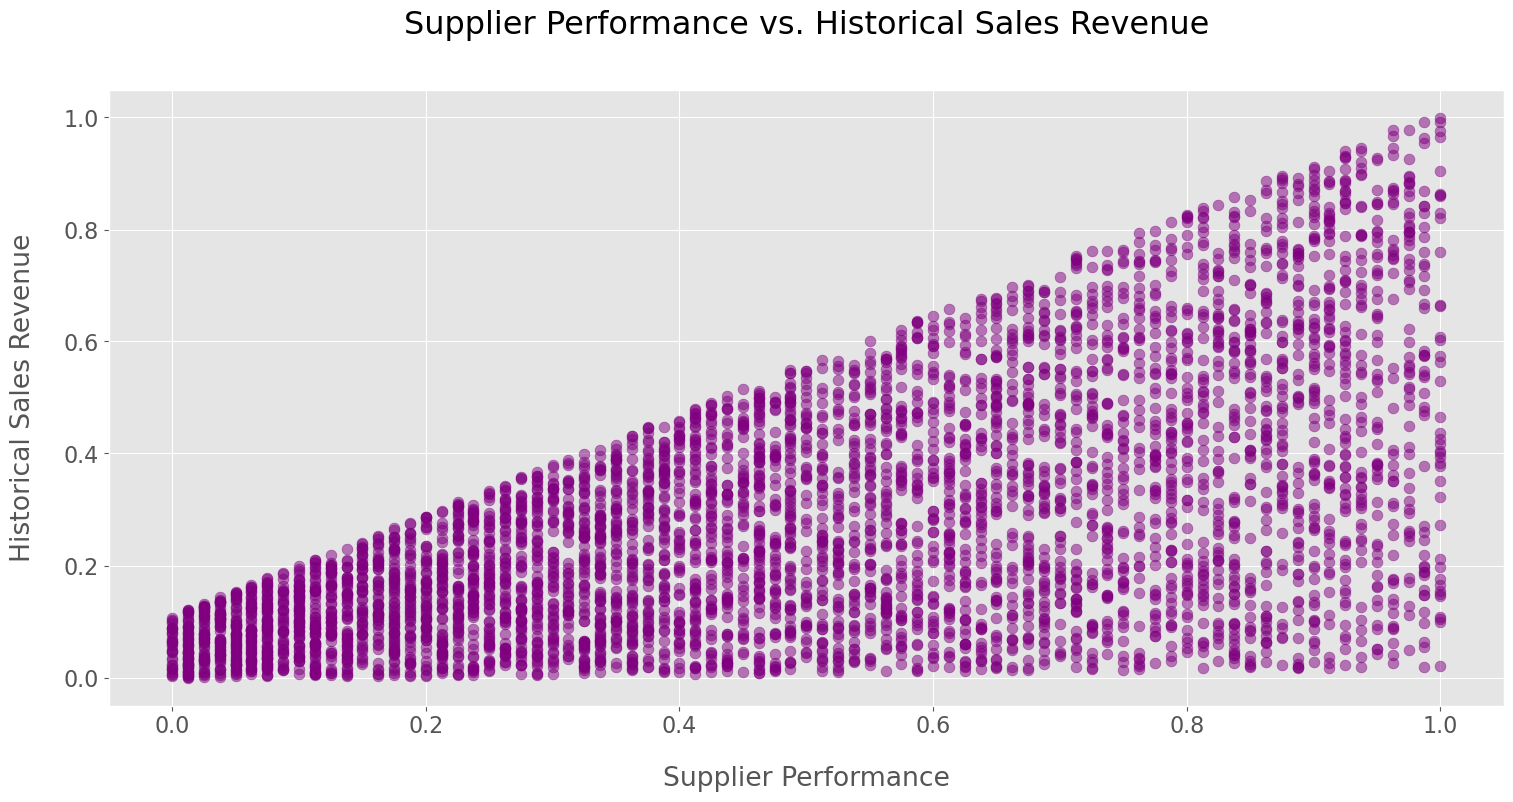

In [18]:
plt.figure(figsize=(18, 8))
plt.scatter(df['Supplier_Performance'], df['Historical_Sales_Revenue'], alpha=0.5, color='purple',s=60)
plt.xlabel('Supplier Performance', labelpad=20)
plt.ylabel('Historical Sales Revenue', labelpad=20)
plt.title('Supplier Performance vs. Historical Sales Revenue',pad=40)
print()
plt.show()

### Inference on ScatterPlot 4 (Customer Rating vs Sales Revenue)
* Supplier may have a better product or service offering.
* Supplier may have a more efficient distribution network.
* Supplier may have a better marketing strategy.
* Supplier may have a better customer relationship management (CRM) system.

In [19]:
# Values greater than 0.5 will be assigned 0, and values less than 0.5 will be assigned 1
df['Stock_Requirement'] = df['Stock_Available'].apply(lambda x: 0 if x > 0.5 else 1)
df.head()

Date  Day_of_Week  Month  Product_ID Product_Category  Product_Price  \
0  2010-01-01            4      1        4615         Clothing       0.340335   
1  2010-01-02            5      1        2805        Furniture       0.333136   
2  2010-01-03            6      1        2297            Books       0.301777   
3  2010-01-04            0      1        9944         Clothing       0.010266   
4  2010-01-05            1      1        6502             Toys       0.291723   

   Historical_Sales_Quantity  Historical_Sales_Revenue  \
0                   0.653670                  0.016314   
1                   0.158257                  0.172115   
2                   0.587156                  0.104641   
3                   0.160550                  0.253016   
4                   0.745413                  0.439217   

   Current_Inventory_Level  Reorder_Point  ...  Customer_Segmentation  \
0                 0.696970       0.310608  ...               Segment1   
1                 0.831650       0.075326  ...               Segment2   
2                 0.188552       0.063809  ...               Segment2   
3                 0.565657       0.024414  ...               Segment2   
4                 0.484848       0.218401  ...               Segment1   

  Economic_Indicator Supplier_Performance  Customer_Rating  Stock_Available  \
0              0.470               0.1125           0.6350         0.722908   
1              0.170               0.5125           0.1350         0.773663   
2              0.450               0.0500           0.6350         0.606310   
3              0.510               0.3500           0.1400         0.021948   
4              0.845               0.6750           0.7675         0.338820   

   Sales_Quantity  Promotion_Flag  Sales_Revenue  Year  Stock_Requirement  
0        0.727273               1       0.053652  2010                  0  
1        0.738636               1       0.069980  2010                  0  
2        0.704545               1       0.494886  2010                  0  
3        0.022727               1       0.160596  2010                  1  
4        0.488636               1       0.427059  2010                  1  

[5 rows x 22 columns]

## 5. Supervised Learning Models
1. Logistic Regression
2. Linear Regression
3. Knn Classification 
4. Naive Bayers
5. Decission Trees

### Training, Validation and Test Dataset 

In [20]:
train,valid,test=np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
print("Rows Division")
print("------------------------------")
print("Total Size - ",len(df),"Rows")
print("Training DataSet - ",len(train),"Rows")
print("Validation DataSet -",len(valid),"Rows")
print("Testing DataSet -",len(test),"Rows")

Rows Division
------------------------------
Total Size -  5000 Rows
Training DataSet -  3000 Rows
Validation DataSet - 1000 Rows
Testing DataSet - 1000 Rows


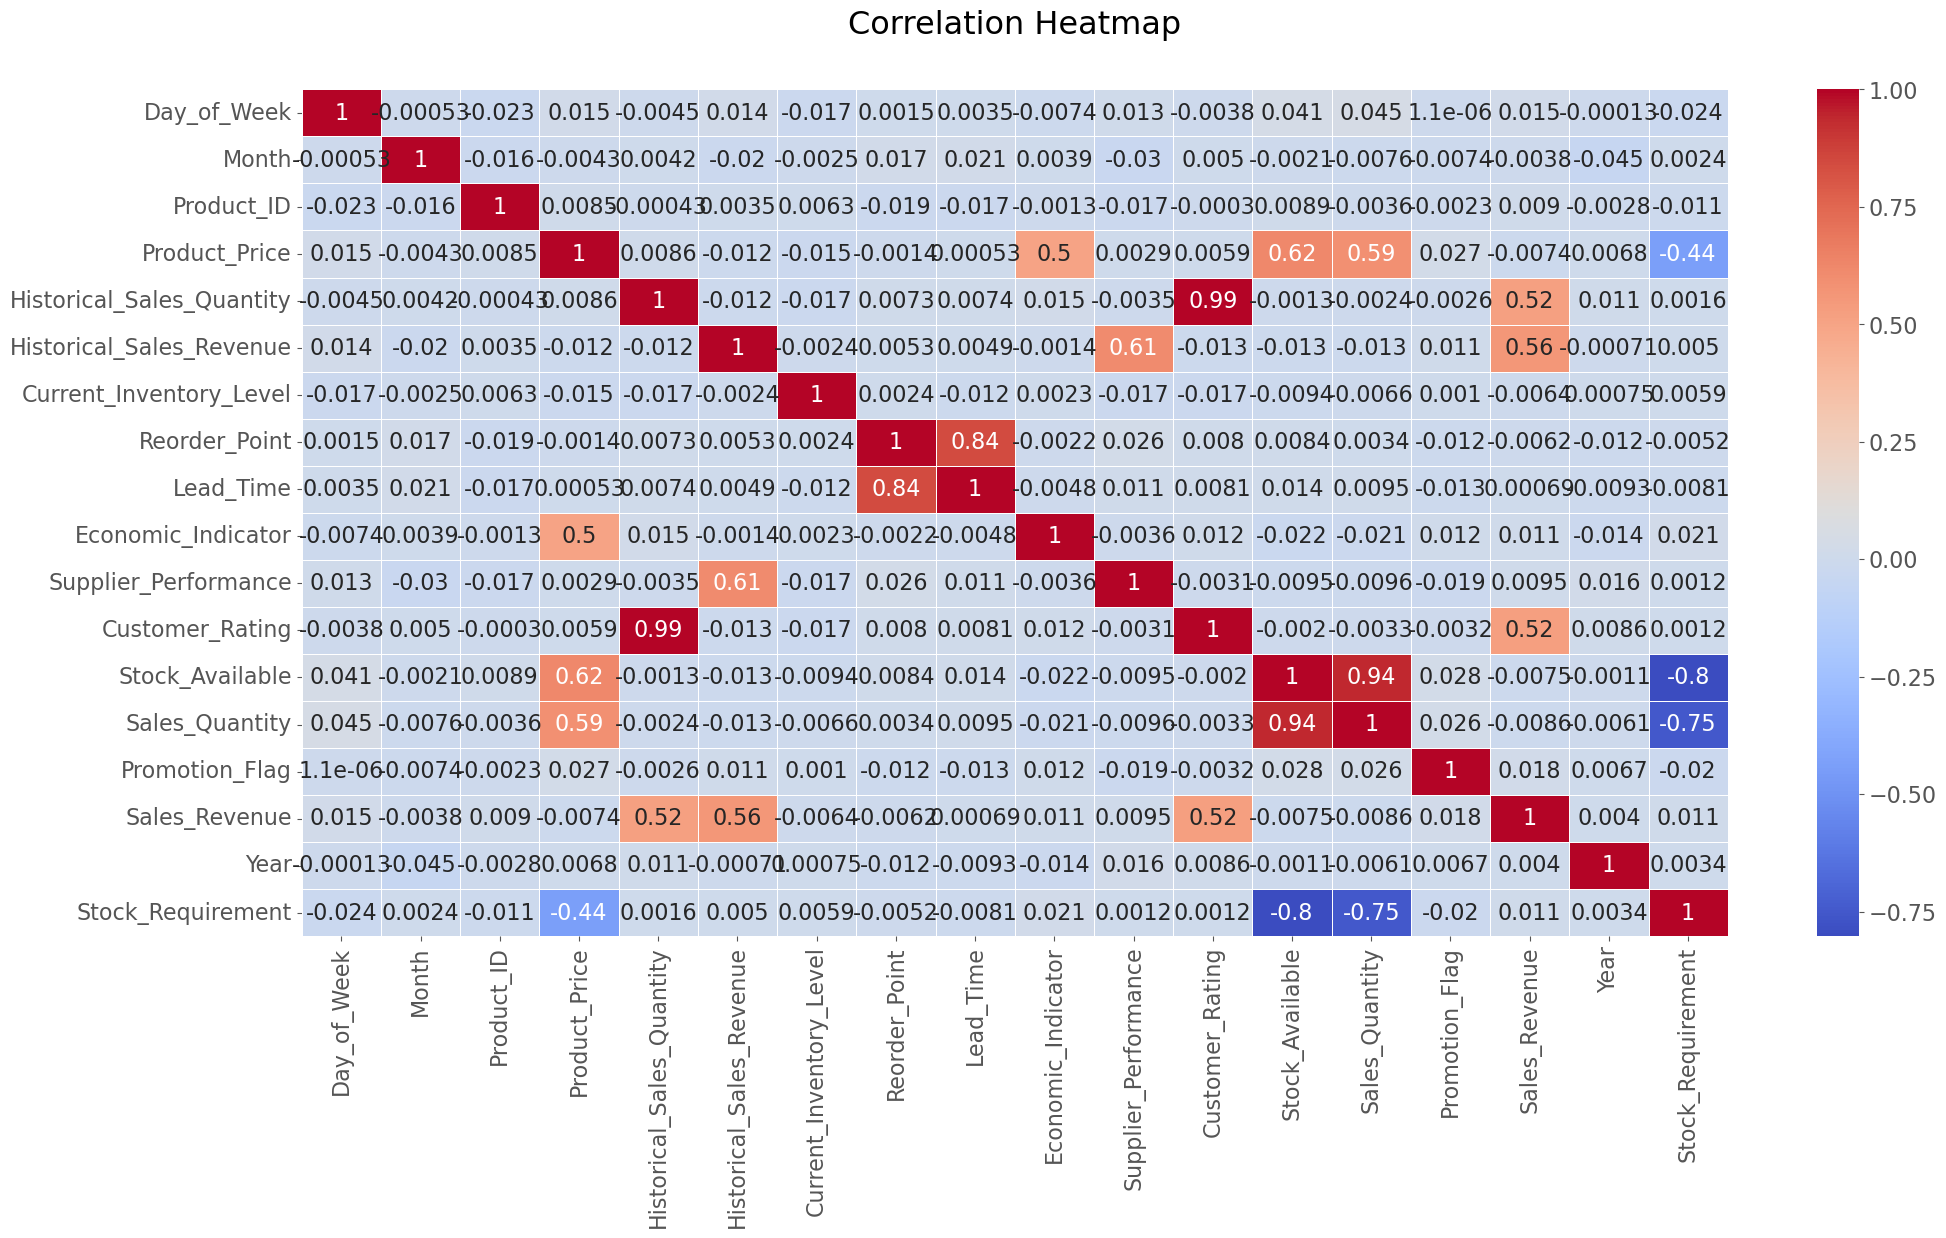

In [21]:
import warnings

# Disabling all warnings
warnings.filterwarnings("ignore")

# Calculating the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(23, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap',pad=40)
print()
plt.show()

### 1. Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

lg_model=LogisticRegression(penalty='l2', solver='liblinear', C=0.5)
#saga - used for larger dataset

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']]
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
lg_model.fit(X_train, y_train)

LogisticRegression(C=0.5, solver='liblinear')

In [23]:
print(len(df[df['Stock_Requirement'] == 0]))
print(len(df[df['Stock_Requirement'] == 1]))

1200
3800


In [24]:
y_pred = lg_model.predict(X_test)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.927
Confusion Matrix:
[[173  51]
 [ 22 754]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       224
           1       0.94      0.97      0.95       776

    accuracy                           0.93      1000
   macro avg       0.91      0.87      0.89      1000
weighted avg       0.93      0.93      0.93      1000



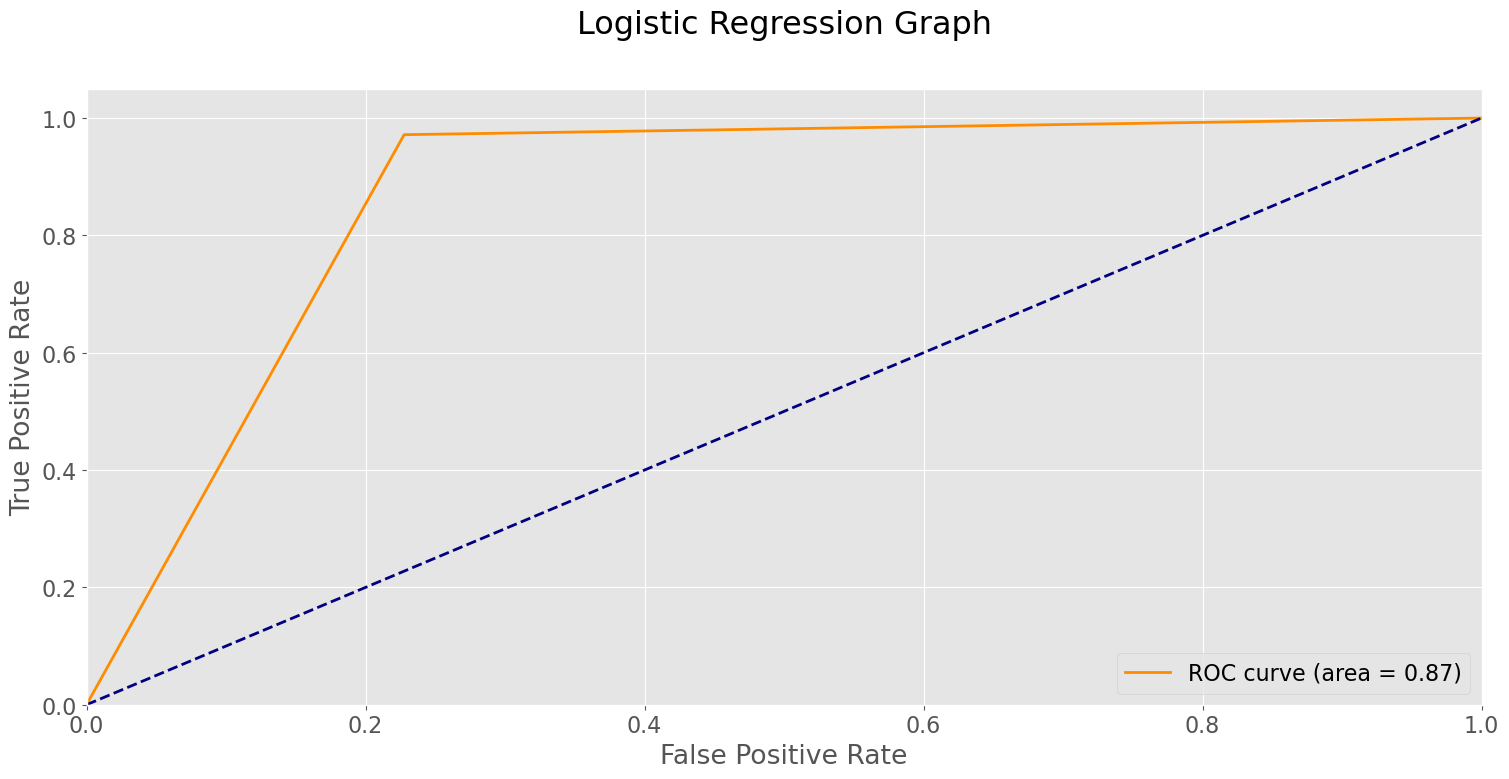

In [26]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(18, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Graph',pad=40)
plt.legend(loc='lower right')
print()
plt.show()

### Inference from the Logistic Regression
* The graph is well-labeled and easy to understand. The title of the graph is clear and concise, and the axes are labeled with the correct units.
* The curve is relatively high, which means that the model is doing a good job of identifying both positive and negative cases. The area under the curve (AUC) is 0.88, which is considered to be a good score.
* The curve is not a perfect curve, but it is not jagged or has sharp turns. This means that the model is not overfit to the training data.

### 2. linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

linear_model=LinearRegression()
#saga - used for larger dataset

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']]
target = df['Stock_Available']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
linear_model.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred=linear_model.predict(X_test)
c=linear_model.intercept_
m=linear_model.coef_
print(c,m)

-0.04080950938275574 [ 0.22953686 -0.07484465  0.94360892  0.00369308]


In [29]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')


Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.07
R-squared (R²) Score: 0.89


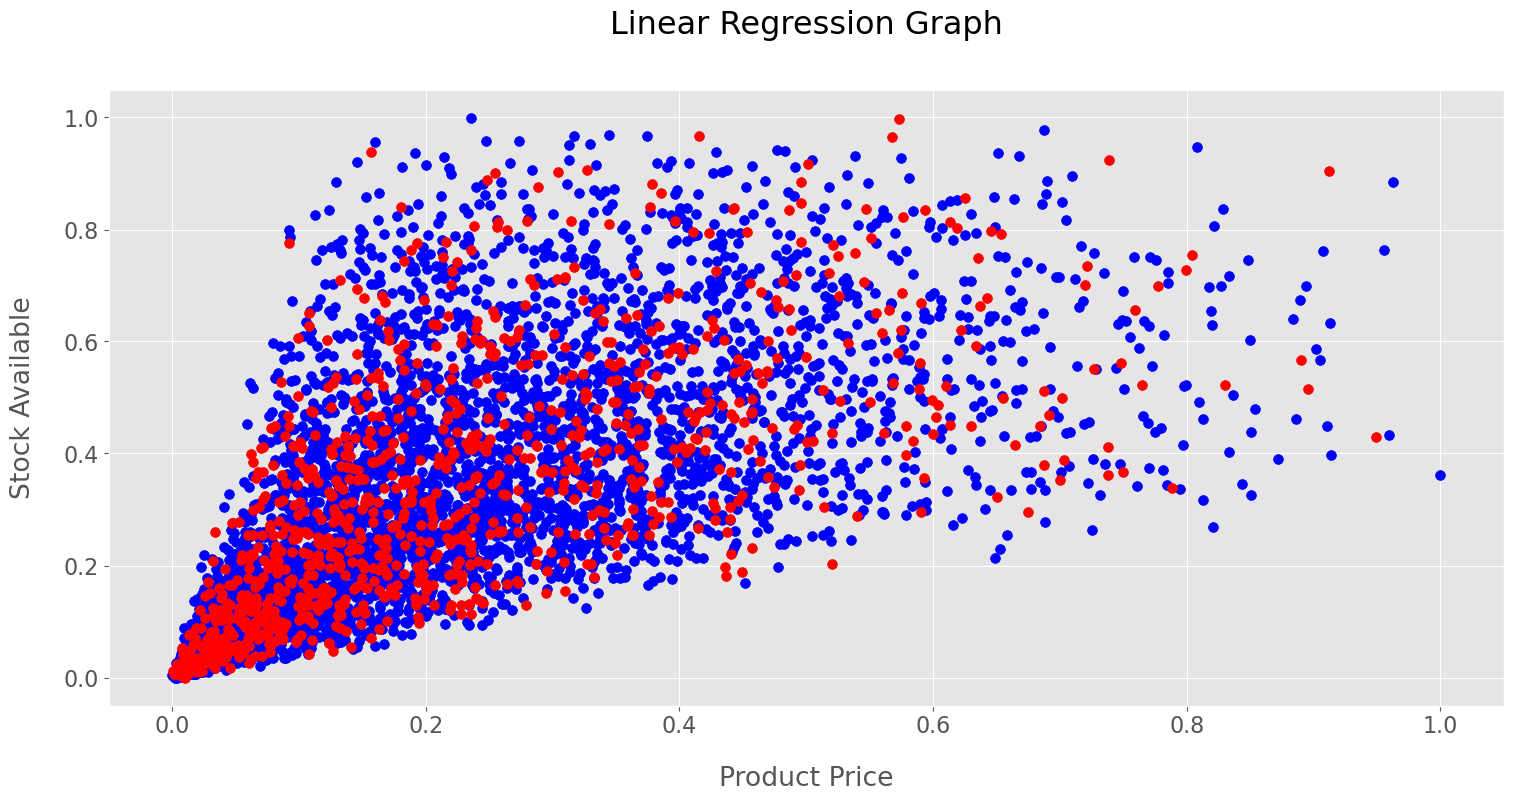

In [30]:
plt.figure(figsize=(18,8))
plt.scatter(X_train['Product_Price'],y_train,color='blue',s=50)
plt.scatter(X_test['Product_Price'],y_test,color="red",s=50)
plt.xlabel("Product Price",labelpad=20)
plt.ylabel("Stock Available",labelpad=20)
plt.title("Linear Regression Graph",pad=40)
print()
plt.show()

### Inference from the Linear Regression
The scatter plot shows that there is a positive correlation between product price and stock availability. This means that as the price of a product increases, the availability of the product also increases. However, the correlation is not very strong, as there are a few products that do not follow the trend.

There are a few possible explanations for this correlation:

* As the price of a product increases, it becomes more profitable for businesses to stock the product.
* As the price of a product increases, it becomes more likely that customers will buy the product, which increases demand and leads to businesses stocking more of the product.
* There may be other factors, such as the product's quality or the customer's perception of the brand, that are also influencing stock availability.

### 3. KNN Classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

k=5
knn_model=KNeighborsClassifier(n_neighbors=k)

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']] 
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [32]:
y_pred = knn_model.predict(X_test)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.914
Confusion Matrix:
[[183  41]
 [ 45 731]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       224
           1       0.95      0.94      0.94       776

    accuracy                           0.91      1000
   macro avg       0.87      0.88      0.88      1000
weighted avg       0.91      0.91      0.91      1000



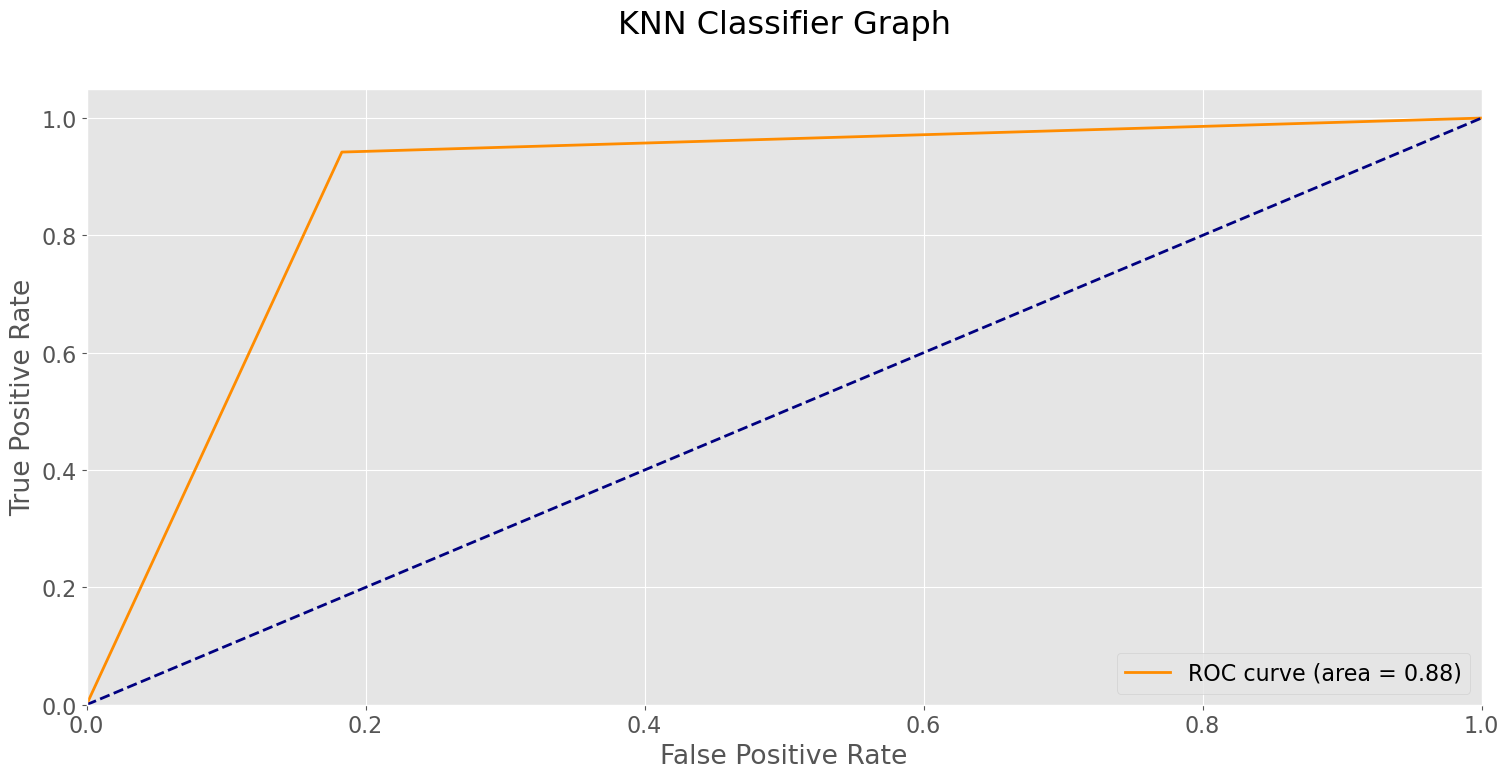

In [34]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(18, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier Graph',pad=40)
plt.legend(loc='lower right')
print()
plt.show()

### Inference from the KNN Classifier
* The graph shows the true positive rate and the false positive rate for different values of K. The true positive rate is the percentage of positive cases that are correctly identified as positive. The false positive rate is the percentage of negative cases that are incorrectly identified as positive.

* The graph shows that the true positive rate increases as K increases. This is because as K increases, the model becomes more conservative and is less likely to make mistakes. However, the false positive rate also increases as K increases. This is because as K increases, the model becomes more likely to miss positive cases.

### 4. Naive Bayers

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


bayers_model=GaussianNB()

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']]
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
bayers_model.fit(X_train, y_train)

GaussianNB()

In [36]:
y_pred=bayers_model.predict(X_test)

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.915
Confusion Matrix:
[[190  34]
 [ 51 725]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       224
           1       0.96      0.93      0.94       776

    accuracy                           0.92      1000
   macro avg       0.87      0.89      0.88      1000
weighted avg       0.92      0.92      0.92      1000



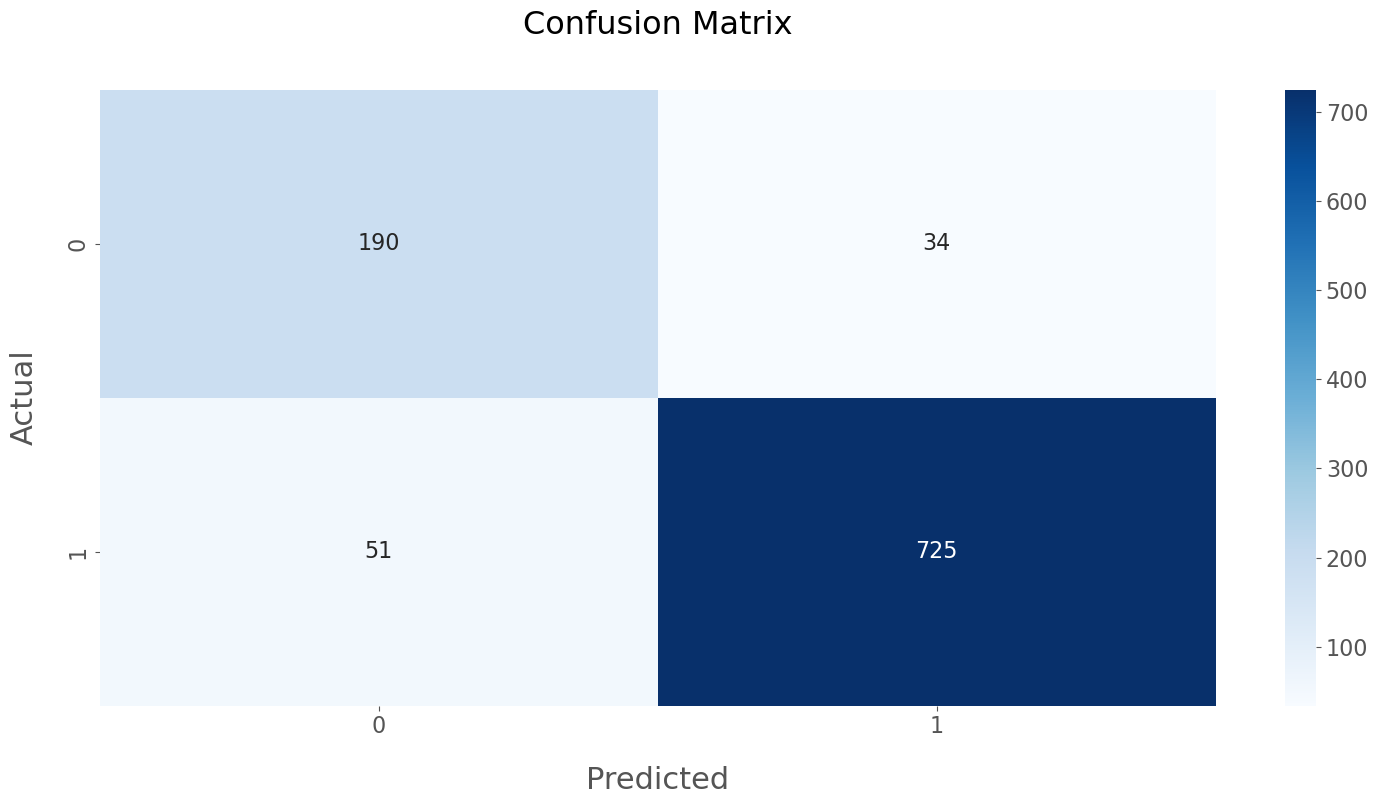

In [38]:
# Visualize the confusion matrix
plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted',fontsize=22,labelpad=20)
plt.ylabel('Actual',fontsize=22,labelpad=20)
plt.title('Confusion Matrix',pad=40)
print()
plt.show()

### Inference from the Naive Bayers Model
The confusion matrix shows that the naive Bayes classifier has a true positive rate of 0.7 and a false positive rate of 0.3. This means that the classifier is able to correctly identify 70% of the positive cases, and it is misclassifying 30% of the negative cases as positive.

This is actually a good accuracy for a naive Bayes classifier. Naive Bayes is a simple classifier that assumes that the features are independent of each other. This assumption may not be met in this dataset, but the classifier is still able to achieve a good accuracy.

* The true positive rate is high, which means that the classifier is very good at identifying positive cases.
* The false positive rate is low, which means that the classifier is not misclassifying many negative cases as positive.
* The classifier may be well-suited for this dataset, as it assumes that the features are independent of each other.

### Decision Tree Classifier
* CART MODEL

In [39]:
def gini_impurity(class_labels):
    # Count the occurrences of each class label in the dataset
    class_counts = np.bincount(class_labels)
    
    # Calculate the probability of each class
    class_probs = class_counts / len(class_labels)
    
    # Calculate the Gini impurity
    gini = 1 - np.sum(class_probs**2)
    
    return gini

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']] 
for loop in features:
    gini = gini_impurity(df[loop])
    print(f'Gini Impurity of {loop}: {gini:.4f}')

Gini Impurity of Product_Price: 0.0004
Gini Impurity of Economic_Indicator: 0.0044
Gini Impurity of Sales_Quantity: 0.0008
Gini Impurity of Sales_Revenue: 0.0004


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


cart_classifier = DecisionTreeClassifier(criterion='gini')

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']] 
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
cart_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred_cart = cart_classifier.predict(X_test)

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_cart)
conf_matrix = confusion_matrix(y_test, y_pred_cart)
classification_rep = classification_report(y_test, y_pred_cart)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.903
Confusion Matrix:
[[180  44]
 [ 53 723]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       224
           1       0.94      0.93      0.94       776

    accuracy                           0.90      1000
   macro avg       0.86      0.87      0.86      1000
weighted avg       0.90      0.90      0.90      1000



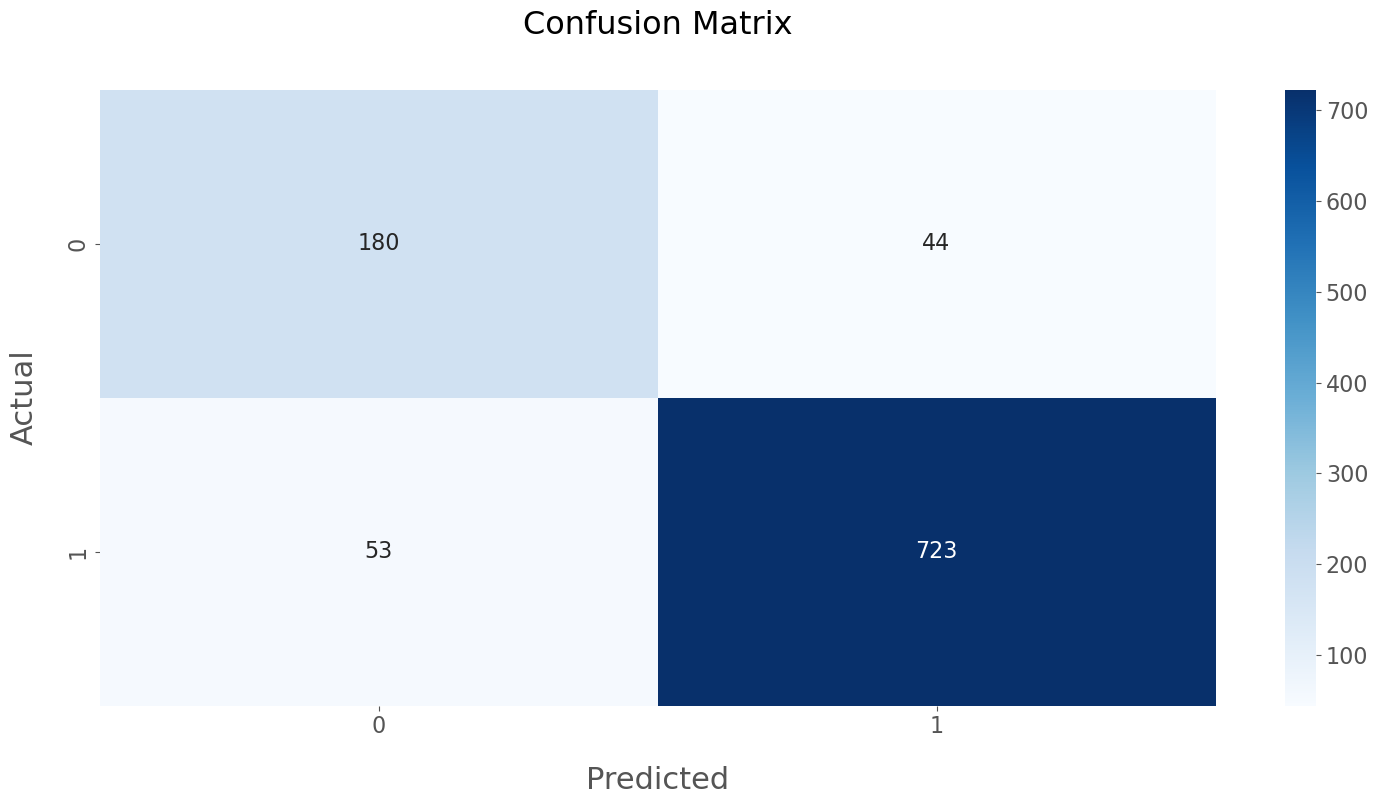

In [43]:
# Visualize the confusion matrix
plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted',fontsize=22,labelpad=20)
plt.ylabel('Actual',fontsize=22,labelpad=20)
plt.title('Confusion Matrix',pad=40)
print()
plt.show()

### Decision Tree Classifier
* ID3 MODEL

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


id3_classifier = DecisionTreeClassifier(criterion='entropy')

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']] 
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
id3_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
y_pred_id3 = cart_classifier.predict(X_test)

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_id3)
conf_matrix = confusion_matrix(y_test, y_pred_id3)
classification_rep = classification_report(y_test, y_pred_id3)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.903
Confusion Matrix:
[[180  44]
 [ 53 723]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       224
           1       0.94      0.93      0.94       776

    accuracy                           0.90      1000
   macro avg       0.86      0.87      0.86      1000
weighted avg       0.90      0.90      0.90      1000



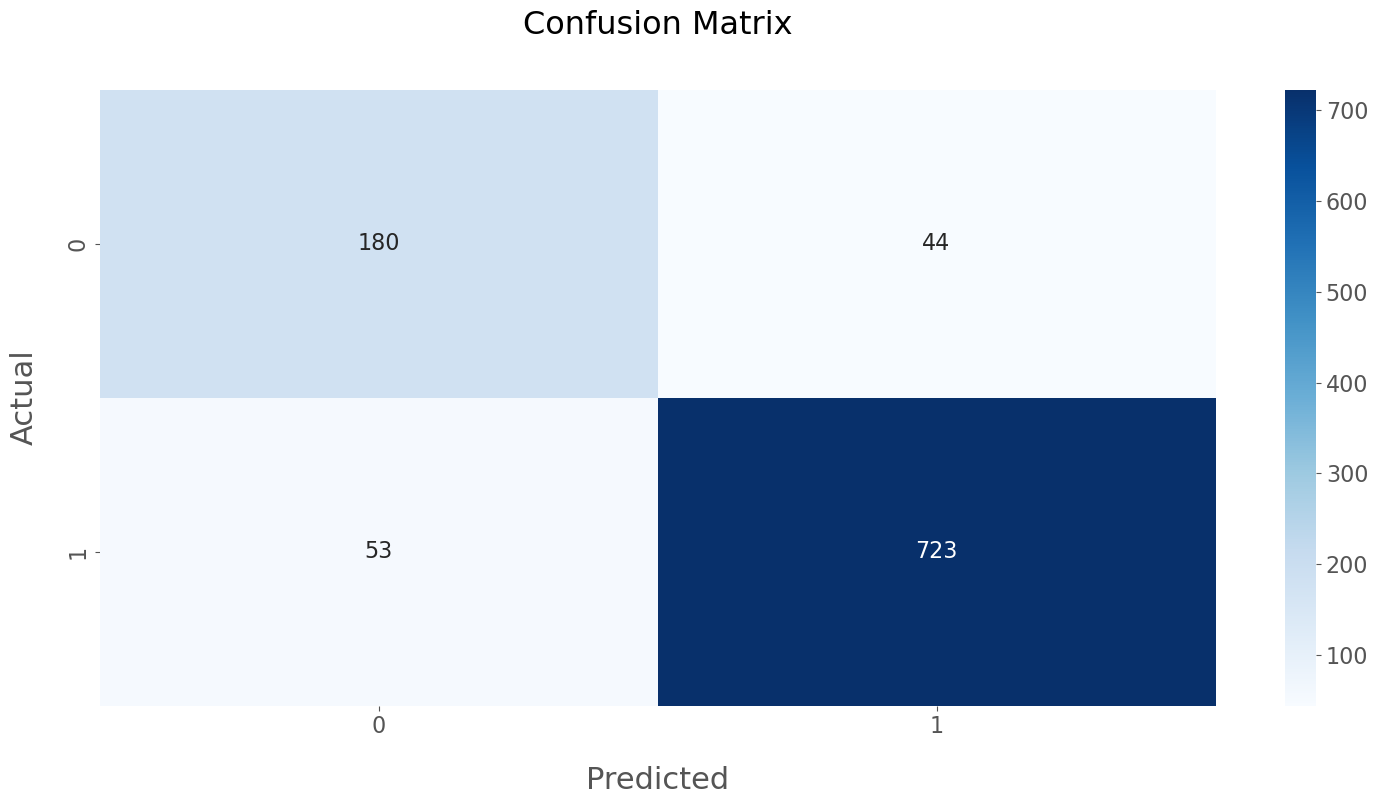

In [47]:
# Visualize the confusion matrix
plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted',fontsize=22,labelpad=20)
plt.ylabel('Actual',fontsize=22,labelpad=20)
plt.title('Confusion Matrix',pad=40)
print()
plt.show()

### Decision Tree Classifier
* C45 Classifier 

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


c45_classifier = DecisionTreeClassifier(criterion='gini', splitter='best')

features = df[['Product_Price', 'Economic_Indicator','Sales_Quantity','Sales_Revenue']] 
target = df['Stock_Requirement']

# Spliting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
c45_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred_c45 = c45_classifier.predict(X_test)

In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_c45)
conf_matrix = confusion_matrix(y_test, y_pred_c45)
classification_rep = classification_report(y_test, y_pred_c45)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.905
Confusion Matrix:
[[181  43]
 [ 52 724]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       224
           1       0.94      0.93      0.94       776

    accuracy                           0.91      1000
   macro avg       0.86      0.87      0.87      1000
weighted avg       0.91      0.91      0.91      1000



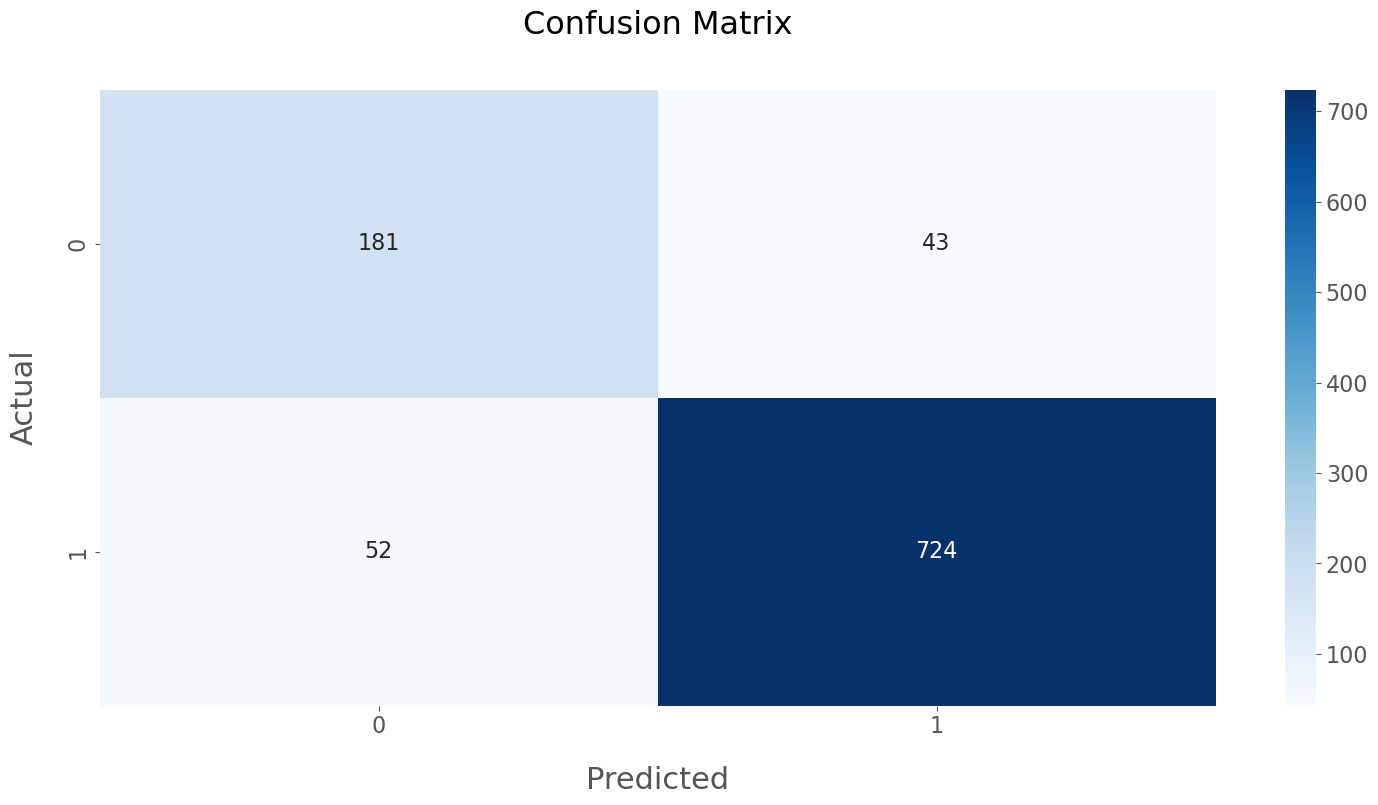

In [51]:
# Visualize the confusion matrix
plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted',fontsize=22,labelpad=20)
plt.ylabel('Actual',fontsize=22,labelpad=20)
plt.title('Confusion Matrix',pad=40)
print()
plt.show()

### Inference Based on All the 3 Approaches
* The data is not very complex and that the simple methods are able to capture the underlying relationships.
* The data is well-balanced and that there are no outliers or noise that would affect the results.
* The methods are robust and that they are not sensitive to the specific features of the data.

In [55]:
df1=df

In [58]:
# %pip install xgboost
# Data manipulation
import pandas as pd
# Manipulation with dates
from datetime import date
from dateutil.relativedelta import relativedelta
# Machine learning
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Note: you may need to restart the kernel to use updated packages.


In [69]:
df1['Date'] = pd.to_datetime(data['Date'])
r = pd.date_range(start=data['Date'].min(), end=data['Date'].max())
df1 = data.set_index('Date').reindex(r).fillna(0.0).rename_axis('Date').reset_index()

df1['Month'] = data['Date'].dt.month
df1['Day'] = data['Date'].dt.day
df1['Workday_N'] = np.busday_count(
                    data['Date'].values.astype('datetime64[M]'),
                    data['Date'].values.astype('datetime64[D]'))
df1['Week_day'] = data['Date'].dt.weekday
df1['Week_of_month'] = (data['Date'].dt.day 
                         - data['Date'].dt.weekday - 2) // 7 + 2
df1['Weekday_order'] = (data['Date'].dt.day + 6) // 7
df1
# df1 = data.set_index('Date')

Date  Day_of_Week  Month  Product_ID Product_Category  \
0    2010-01-01            4      1        4615         Clothing   
1    2010-01-02            5      1        2805        Furniture   
2    2010-01-03            6      1        2297            Books   
3    2010-01-04            0      1        9944         Clothing   
4    2010-01-05            1      1        6502             Toys   
...         ...          ...    ...         ...              ...   
4995 2023-09-05            1      9        6342      Electronics   
4996 2023-09-06            2      9        5743      Electronics   
4997 2023-09-07            3      9        1328            Books   
4998 2023-09-08            4      9        4024             Toys   
4999 2023-09-09            5      9        8662            Books   

      Product_Price  Historical_Sales_Quantity  Historical_Sales_Revenue  \
0          0.340335                   0.653670                  0.016314   
1          0.333136                   0.158257                  0.172115   
2          0.301777                   0.587156                  0.104641   
3          0.010266                   0.160550                  0.253016   
4          0.291723                   0.745413                  0.439217   
...             ...                        ...                       ...   
4995       0.060954                   0.740826                  0.574315   
4996       0.038683                   0.807339                  0.360216   
4997       0.092705                   0.311927                  0.401406   
4998       0.026652                   0.834862                  0.075765   
4999       0.255139                   0.713303                  0.327573   

      Current_Inventory_Level  Reorder_Point  ...  Stock_Available  \
0                    0.696970       0.310608  ...         0.722908   
1                    0.831650       0.075326  ...         0.773663   
2                    0.188552       0.063809  ...         0.606310   
3                    0.565657       0.024414  ...         0.021948   
4                    0.484848       0.218401  ...         0.338820   
...                       ...            ...  ...              ...   
4995                 0.020202       0.646929  ...         0.026063   
4996                 0.272727       0.881223  ...         0.142661   
4997                 0.393939       0.050025  ...         0.417010   
4998                 0.521886       0.080559  ...         0.056241   
4999                 0.326599       0.490955  ...         0.539095   

     Sales_Quantity Promotion_Flag  Sales_Revenue  Year  Day  Workday_N  \
0          0.727273              1       0.053652  2010    1          0   
1          0.738636              1       0.069980  2010    2          1   
2          0.704545              1       0.494886  2010    3          1   
3          0.022727              1       0.160596  2010    4          1   
4          0.488636              1       0.427059  2010    5          2   
...             ...            ...            ...   ...  ...        ...   
4995       0.193182              1       0.387404  2023    5          2   
4996       0.147727              1       0.344877  2023    6          3   
4997       0.545455              1       0.209582  2023    7          4   
4998       0.125000              1       0.257850  2023    8          5   
4999       0.568182              1       0.537413  2023    9          6   

      Week_day  Week_of_month  Weekday_order  
0            4              1              1  
1            5              1              1  
2            6              1              1  
3            0              2              1  
4            1              2              1  
...        ...            ...            ...  
4995         1              2              1  
4996         2              2              1  
4997         3              2              1  
4998         4              2              2  
4999         5        

In [103]:
features = df[['Day', 'Workday_N', 'Week_day', 'Week_of_month', 'Weekday_order', 'Month']]
print(features)
target = df['Stock_Available']
x_train, x_test, y_train, y_test = train_test_split(features, target,test_size=0.3, random_state=1, shuffle=False)

      Day  Workday_N  Week_day  Week_of_month  Weekday_order  Month
0       1          0         4              1              1      1
1       2          1         5              1              1      1
2       3          1         6              1              1      1
3       4          1         0              2              1      1
4       5          2         1              2              1      1
...   ...        ...       ...            ...            ...    ...
4995    5          2         1              2              1      9
4996    6          3         2              2              1      9
4997    7          4         3              2              1      9
4998    8          5         4              2              2      9
4999    9          6         5              2              2      9

[5000 rows x 6 columns]


In [97]:
DM_train = xgb.DMatrix(data=x_train, label=y_train)
grid_param = {"learning_rate": [0.01, 0.1],
              "n_estimators": [100, 150, 200],
              "alpha": [0.1, 0.5, 1],
              "max_depth": [2, 3, 4]}
model = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=model, param_grid=grid_param,
                       scoring="neg_mean_squared_error",
                       cv=4, verbose=1)
grid_mse.fit(x_train, y_train)
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 54 candidates, totalling 216 fits
Best parameters found:  {'alpha': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Lowest RMSE found:  0.22583646920349862


In [98]:
xgb_model = xgb.XGBClassifier(objective ='reg:squarederror', 
                            colsample_bytree = 1, 
                            learning_rate = 0.1,
                            max_depth = 4, 
                            alpha = 0.5, 
                            n_estimators = 200)
xgb_model.fit(x_train, y_train)
xgb_prediction = xgb_model.predict(x_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593
 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611
 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629
 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647
 648], got [0.         0.00274348 0.00411523 0.00548697 0.00685871 0.00823045
 0.00960219 0.01097394 0.01234568 0.01371742 0.01508916 0.01646091
 0.01783265 0.01920439 0.02057613 0.02194787 0.02331962 0.02469136
 0.0260631  0.02743484 0.02880658 0.03017833 0.03155007 0.03292181
 0.03429355 0.03566529 0.03703704 0.03840878 0.03978052 0.04115226
 0.04252401 0.04389575 0.04526749 0.04663923 0.04801097 0.04938272
 0.05075446 0.0521262  0.05349794 0.05486968 0.05624143 0.05761317
 0.05898491 0.06035665 0.0617284  0.06310014 0.06447188 0.06584362
 0.06721536 0.06858711 0.06995885 0.07133059 0.07270233 0.07407407
 0.07544582 0.07681756 0.0781893  0.07956104 0.08093278 0.08230453
 0.08367627 0.08504801 0.08641975 0.0877915  0.08916324 0.09053498
 0.09190672 0.09327846 0.09465021 0.09602195 0.09739369 0.09876543
 0.10013717 0.10150892 0.10288066 0.1042524  0.10562414 0.10699588
 0.10836763 0.10973937 0.11111111 0.11248285 0.1138546  0.11522634
 0.11659808 0.11796982 0.11934156 0.12071331 0.12208505 0.12345679
 0.12482853 0.12620027 0.12757202 0.12894376 0.1303155  0.13168724
 0.13305898 0.13443073 0.13580247 0.13717421 0.13854595 0.1399177
 0.14128944 0.14266118 0.14403292 0.14540466 0.14677641 0.14814815
 0.14951989 0.15089163 0.15226337 0.15363512 0.15500686 0.1563786
 0.15775034 0.15912209 0.16049383 0.16186557 0.16323731 0.16460905
 0.1659808  0.16735254 0.16872428 0.17009602 0.17146776 0.17283951
 0.17421125 0.17558299 0.17695473 0.17832647 0.17969822 0.18106996
 0.1824417  0.18381344 0.18518519 0.18655693 0.18792867 0.18930041
 0.19067215 0.1920439  0.19341564 0.19478738 0.19615912 0.19753086
 0.19890261 0.20027435 0.20164609 0.20301783 0.20438957 0.20576132
 0.20713306 0.2085048  0.20987654 0.21124829 0.21262003 0.21399177
 0.21536351 0.21673525 0.218107   0.21947874 0.22085048 0.22222222
 0.22359396 0.22496571 0.22633745 0.22770919 0.22908093 0.23045267
 0.23182442 0.23319616 0.2345679  0.23593964 0.23731139 0.23868313
 0.24005487 0.24142661 0.24279835 0.2441701  0.24554184 0.24691358
 0.24828532 0.24965706 0.25102881 0.25240055 0.25377229 0.25514403
 0.25651578 0.25788752 0.25925926 0.260631   0.26200274 0.26337449
 0.26474623 0.26611797 0.26748971 0.26886145 0.2702332  0.27160494
 0.27297668 0.27434842 0.27572016 0.27709191 0.27846365 0.27983539
 0.28120713 0.28257888 0.28395062 0.28532236 0.2866941  0.28806584
 0.28943759 0.29080933 0.29218107 0.29355281 0.29492455 0.2962963
 0.29766804 0.29903978 0.30041152 0.30178326 0.30315501 0.30452675
 0.30589849 0.30727023 0.30864198 0.31001372 0.31138546 0.3127572
 0.31412894 0.31550069 0.31687243 0.31824417 0.31961591 0.32098765
 0.3223594  0.32373114 0.32510288 0.32647462 0.32784636 0.32921811
 0.33058985 0.33196159 0.33333333 0.33470508 0.33607682 0.33744856
 0.3388203  0.34019204 0.34156379 0.34293553 0.34430727 0.34567901
 0.34705075 0.3484225  0.34979424 0.35116598 0.35253772 0.35390947
 0.35528121 0.35665295 0.35802469 0.35939643 0.36076818 0.36213992
 0.36351166 0.3648834  0.36625514 0.36762689 0.36899863 0.37037037
 0.37174211 0.37311385 0.3744856  0.37585734 0.37722908 0.37860082
 0.37997257 0.38134431 0.38271605 0.38408779 0.38545953 0.38683128
 0.38820302 0.38957476 0.3909465  0.39231824 0.39368999 0.39506173
 0.39643347 0.39780521 0.39917695 0.4005487  0.40192044 0.40329218
 0.40466392 0.40603567 0.40740741 0.40877915 0.41015089 0.41152263
 0.41289438 0.41426612 0.41563786 0.4170096  0.41838134 0.41975309
 0.42112483 0.42249657 0.42386831 0.42524005 0.4266118  0.42798354
 0.42935528 0.43072702 0.43209877 0.43347051 0.43484225 0.43621399
 0.43758573 0.43895748 0.44032922 0.44170096 0.4430727  0.44444444
 0.44581619 0.44718793 0.44855967 0.44993141 0.45130316 0.4526749
 0.45404664 0.45541838 0.45679012 0.45816187 0.45953361 0.46090535
 0.46227709 0.46364883 0.46502058 0.46639232 0.46776406 0.4691358
 0.47050754 0.47187929 0.47325103 0.47462277 0.47599451 0.47736626
 0.478738   0.48010974 0.48285322 0.48422497 0.48559671 0.48696845
 0.48834019 0.48971193 0.49108368 0.49245542 0.49382716 0.4951989
 0.49657064 0.49794239 0.49931413 0.50068587 0.50205761 0.50342936
 0.5048011  0.50617284 0.50754458 0.50891632 0.51028807 0.51165981
 0.51303155 0.51440329 0.51577503 0.51714678 0.51851852 0.51989026
 0.52263374 0.52400549 0.52537723 0.52674897 0.52812071 0.52949246
 0.5308642  0.53223594 0.53360768 0.53497942 0.53635117 0.53772291
 0.53909465 0.54046639 0.54183813 0.54320988 0.54458162 0.54595336
 0.5473251  0.54869684 0.55006859 0.55144033 0.55281207 0.55418381
 0.55555556 0.5569273  0.55829904 0.55967078 0.56104252 0.56241427
 0.56378601 0.56515775 0.56652949 0.56790123 0.56927298 0.57064472
 0.57201646 0.5733882  0.57475995 0.57613169 0.57750343 0.57887517
 0.58024691 0.58161866 0.5829904  0.58436214 0.58573388 0.58710562
 0.58847737 0.58984911 0.59122085 0.59259259 0.59396433 0.59533608
 0.59670782 0.59807956 0.5994513  0.60082305 0.60219479 0.60356653
 0.60493827 0.60631001 0.60768176 0.6090535  0.61042524 0.61179698
 0.61316872 0.61454047 0.61591221 0.61728395 0.61865569 0.62002743
 0.62139918 0.62277092 0.62414266 0.6255144  0.62688615 0.62825789
 0.62962963 0.63100137 0.63374486 0.6351166  0.63648834 0.63786008
 0.63923182 0.64060357 0.64197531 0.64334705 0.64471879 0.64609053
 0.64746228 0.64883402 0.65020576 0.6515775  0.65294925 0.65432099
 0.65569273 0.65706447 0.65843621 0.65980796 0.6611797  0.66255144
 0.66392318 0.66529492 0.66666667 0.66803841 0.66941015 0.67078189
 0.67215364 0.67352538 0.67489712 0.67626886 0.6776406  0.67901235
 0.68038409 0.68175583 0.68312757 0.68449931 0.68587106 0.6872428
 0.68998628 0.69135802 0.69272977 0.69410151 0.69547325 0.69684499
 0.69821674 0.69958848 0.70096022 0.70233196 0.7037037  0.70507545
 0.70644719 0.70781893 0.70919067 0.71193416 0.7133059  0.71467764
 0.71604938 0.71879287 0.72016461 0.72153635 0.72290809 0.72427984
 0.72565158 0.72702332 0.72839506 0.7297668  0.73113855 0.73251029
 0.73388203 0.73525377 0.73799726 0.74211248 0.74348422 0.74485597
 0.74622771 0.74897119 0.75034294 0.75308642 0.75445816 0.7558299
 0.75720165 0.75994513 0.76131687 0.76268861 0.76406036 0.7654321
 0.76680384 0.76817558 0.76954733 0.77229081 0.77366255 0.77503429
 0.77640604 0.77777778 0.77914952 0.78052126 0.781893   0.78326475
 0.78463649 0.78600823 0.78875171 0.79012346 0.7914952  0.79286694
 0.79423868 0.79561043 0.79698217 0.79835391 0.79972565 0.80109739
 0.80246914 0.80384088 0.80521262 0.80658436 0.8079561  0.80932785
 0.81069959 0.81207133 0.81344307 0.81481481 0.81618656 0.81893004
 0.82030178 0.82167353 0.82304527 0.82441701 0.82578875 0.82716049
 0.82853224 0.82990398 0.83127572 0.83264746 0.83539095 0.83676269
 0.83813443 0.83950617 0.8436214  0.84499314 0.84636488 0.84773663
 0.85459534 0.85596708 0.85871056 0.8600823  0.86145405 0.86282579
 0.86419753 0.86556927 0.86831276 0.87105624 0.87242798 0.87517147
 0.87654321 0.88065844 0.88203018 0.88477366 0.8861454  0.88888889
 0.89163237 0.8957476  0.89711934 0.90123457 0.90260631 0.90672154
 0.90946502 0.91358025 0.91495199 0.91769547 0.91906722 0.92043896
 0.9218107  0.92455418 0.92729767 0.93004115 0.93141289 0.93689986
 0.9382716  0.94101509 0.94238683 0.9478738  0.95061728 0.95198903
 0.95610425 0.96570645 0.96707819 0.96844993 0.97805213 0.99725652
 1.        ]

In [100]:
# knn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto',     
#                            weights = 'distance') 
# knn.fit(x_train, y_train)  
# knn_prediction = knn.predict(x_test)

In [101]:
random_forest = RandomForestClassifier(n_estimators=50,
                                       max_depth=10, random_state=1)
random_forest.fit(x_train, y_train)
rf_prediction = random_forest.predict(x_test)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
xgb_matrix = metrics.confusion_matrix(xgb_prediction, y_test)
print(f"""
Confusion matrix for XGBoost model:
TN:{xgb_matrix[0][0]}    FN:{xgb_matrix[0][1]}
FP:{xgb_matrix[1][0]}    TP:{xgb_matrix[1][1]}""")
knn_matrix = metrics.confusion_matrix(knn_prediction, y_test)
print(f"""
Confusion matrix for KNN model:
TN:{knn_matrix[0][0]}    FN:{knn_matrix[0][1]}
FP:{knn_matrix[1][0]}    TP:{knn_matrix[1][1]}""")
rf_matrix = metrics.confusion_matrix(rf_prediction, y_test)
print(f"""
Confusion matrix for Random Forest model:
TN:{rf_matrix[0][0]}    FN:{rf_matrix[0][1]}
FP:{rf_matrix[1][0]}    TP:{rf_matrix[1][1]}""")

In [91]:
x_predict = pd.DataFrame(pd.date_range(date.today(), (date.today() +
            relativedelta(years=1)),freq='d'), columns=['Date'])
x_predict['Day'] = x_predict['Date'].dt.day
x_predict['Workday_N'] = np.busday_count(
                x_predict['Date'].values.astype('datetime64[M]'),
                x_predict['Date'].values.astype('datetime64[D]'))
x_predict['Week_day'] = x_predict['Date'].dt.weekday
x_predict['Week_of_month'] = (x_predict['Date'].dt.day - 
                              x_predict['Date'].dt.weekday - 2)//7+2
x_predict['Weekday_order'] = (x_predict['Date'].dt.day + 6) // 7
x_predict['Month'] = x_predict['Date'].dt.month
# x_predict['Product_Price'] = x_predict['Pr'].dt.day
# x_predict['Workday_N'] = np.busday_count(
#                 x_predict['Date'].values.astype('datetime64[M]'),
#                 x_predict['Date'].values.astype('datetime64[D]'))
# x_predict['Week_day'] = x_predict['Date'].dt.weekday
# x_predict['Week_of_month'] = (x_predict['Date'].dt.day - 
#                               x_predict['Date'].dt.weekday - 2)//7+2
# x_predict['Weekday_order'] = (x_predict['Date'].dt.day + 6) // 7
# x_predict['Month'] = x_predict['Date'].dt.month
# x_predict = x_predict.set_index('Date')
# prediction = xgb_model.predict(x_predict)
print(x_predict)

          Date  Day  Workday_N  Week_day  Week_of_month  Weekday_order  Month
0   2023-11-08    8          5         2              2              2     11
1   2023-11-09    9          6         3              2              2     11
2   2023-11-10   10          7         4              2              2     11
3   2023-11-11   11          8         5              2              2     11
4   2023-11-12   12          8         6              2              2     11
..         ...  ...        ...       ...            ...            ...    ...
362 2024-11-04    4          1         0              2              1     11
363 2024-11-05    5          2         1              2              1     11
364 2024-11-06    6          3         2              2              1     11
365 2024-11-07    7          4         3              2              1     11
366 2024-11-08    8          5         4              2              2     11

[367 rows x 7 columns]


In [92]:
knn_prediction

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge 


# Split the data into training and testing sets
X = df1[['Day', 'Workday_N', 'Week_day', 'Week_of_month', 'Weekday_order', 'Month']]
y = df1['Stock_Available']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model
model = Ridge(alpha = 0.5,solver ='auto', random_state = 42) 
model.fit(X_train, y_train)

x_predict = pd.DataFrame(pd.date_range(date.today(), (date.today() +
            relativedelta(years=1)),freq='d'), columns=['Date'])
x_predict['Day'] = x_predict['Date'].dt.day
x_predict['Workday_N'] = np.busday_count(
                x_predict['Date'].values.astype('datetime64[M]'),
                x_predict['Date'].values.astype('datetime64[D]'))
x_predict['Week_day'] = x_predict['Date'].dt.weekday
x_predict['Week_of_month'] = (x_predict['Date'].dt.day - 
                              x_predict['Date'].dt.weekday - 2)//7+2
x_predict['Weekday_order'] = (x_predict['Date'].dt.day + 6) // 7
x_predict['Month'] = x_predict['Date'].dt.month
newdf = x_predict.drop ("Date", axis='columns')
newdf
y_pred = model.predict(newdf[:7])


print(x_predict)
print(y_pred)


          Date  Day  Workday_N  Week_day  Week_of_month  Weekday_order  Month
0   2023-11-08    8          5         2              2              2     11
1   2023-11-09    9          6         3              2              2     11
2   2023-11-10   10          7         4              2              2     11
3   2023-11-11   11          8         5              2              2     11
4   2023-11-12   12          8         6              2              2     11
..         ...  ...        ...       ...            ...            ...    ...
362 2024-11-04    4          1         0              2              1     11
363 2024-11-05    5          2         1              2              1     11
364 2024-11-06    6          3         2              2              1     11
365 2024-11-07    7          4         3              2              1     11
366 2024-11-08    8          5         4              2              2     11

[367 rows x 7 columns]
[0.33444629 0.34010956 0.34577283 0.3514

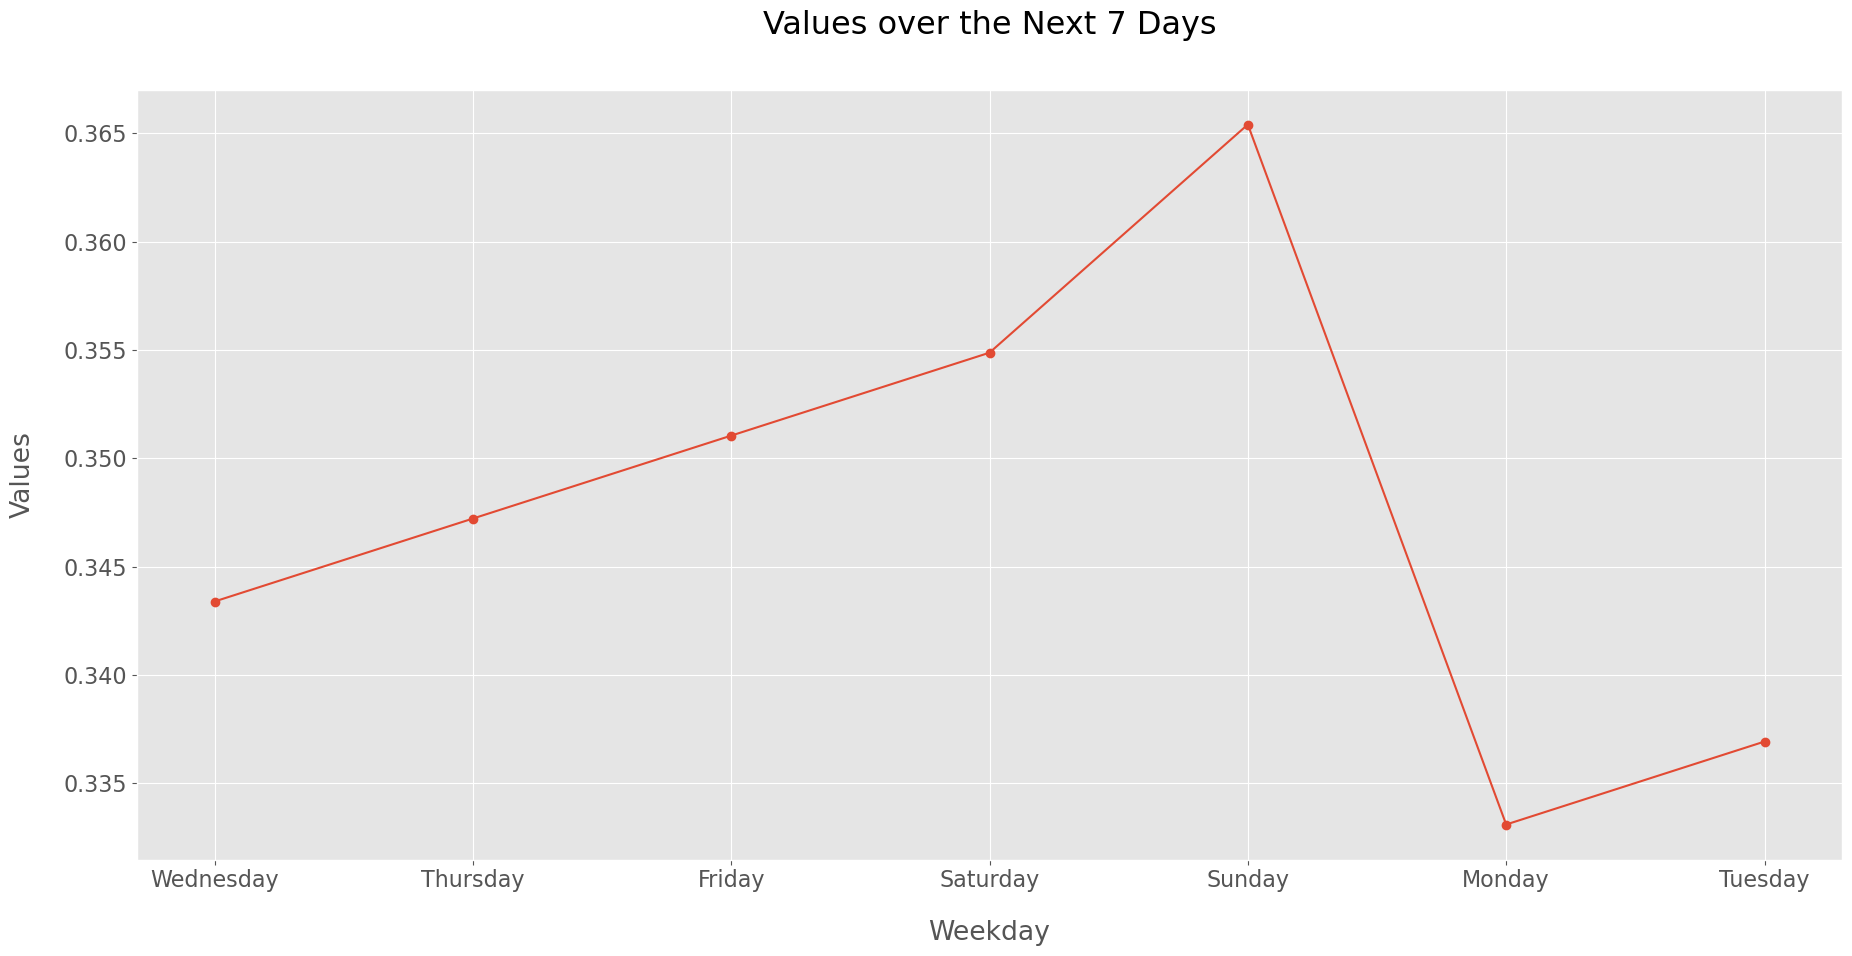

In [147]:
import datetime

# Your data
data = [0.34339122, 0.34721925, 0.35104728, 0.35487532, 0.36540772, 0.33309914, 0.33692717]

# Create a list of weekdays for the next 7 days
weekdays = [(datetime.date.today() + datetime.timedelta(days=i)).strftime('%A') for i in range(7)]

# Create the plot
plt.figure(figsize=(22,10))
plt.plot(weekdays, data, marker='o')

# Set the labels and title
plt.xlabel('Weekday',labelpad=20)
plt.ylabel('Values',labelpad=20)
plt.title('Values over the Next 7 Days',pad=40)
print()
# Show the plot
plt.show()


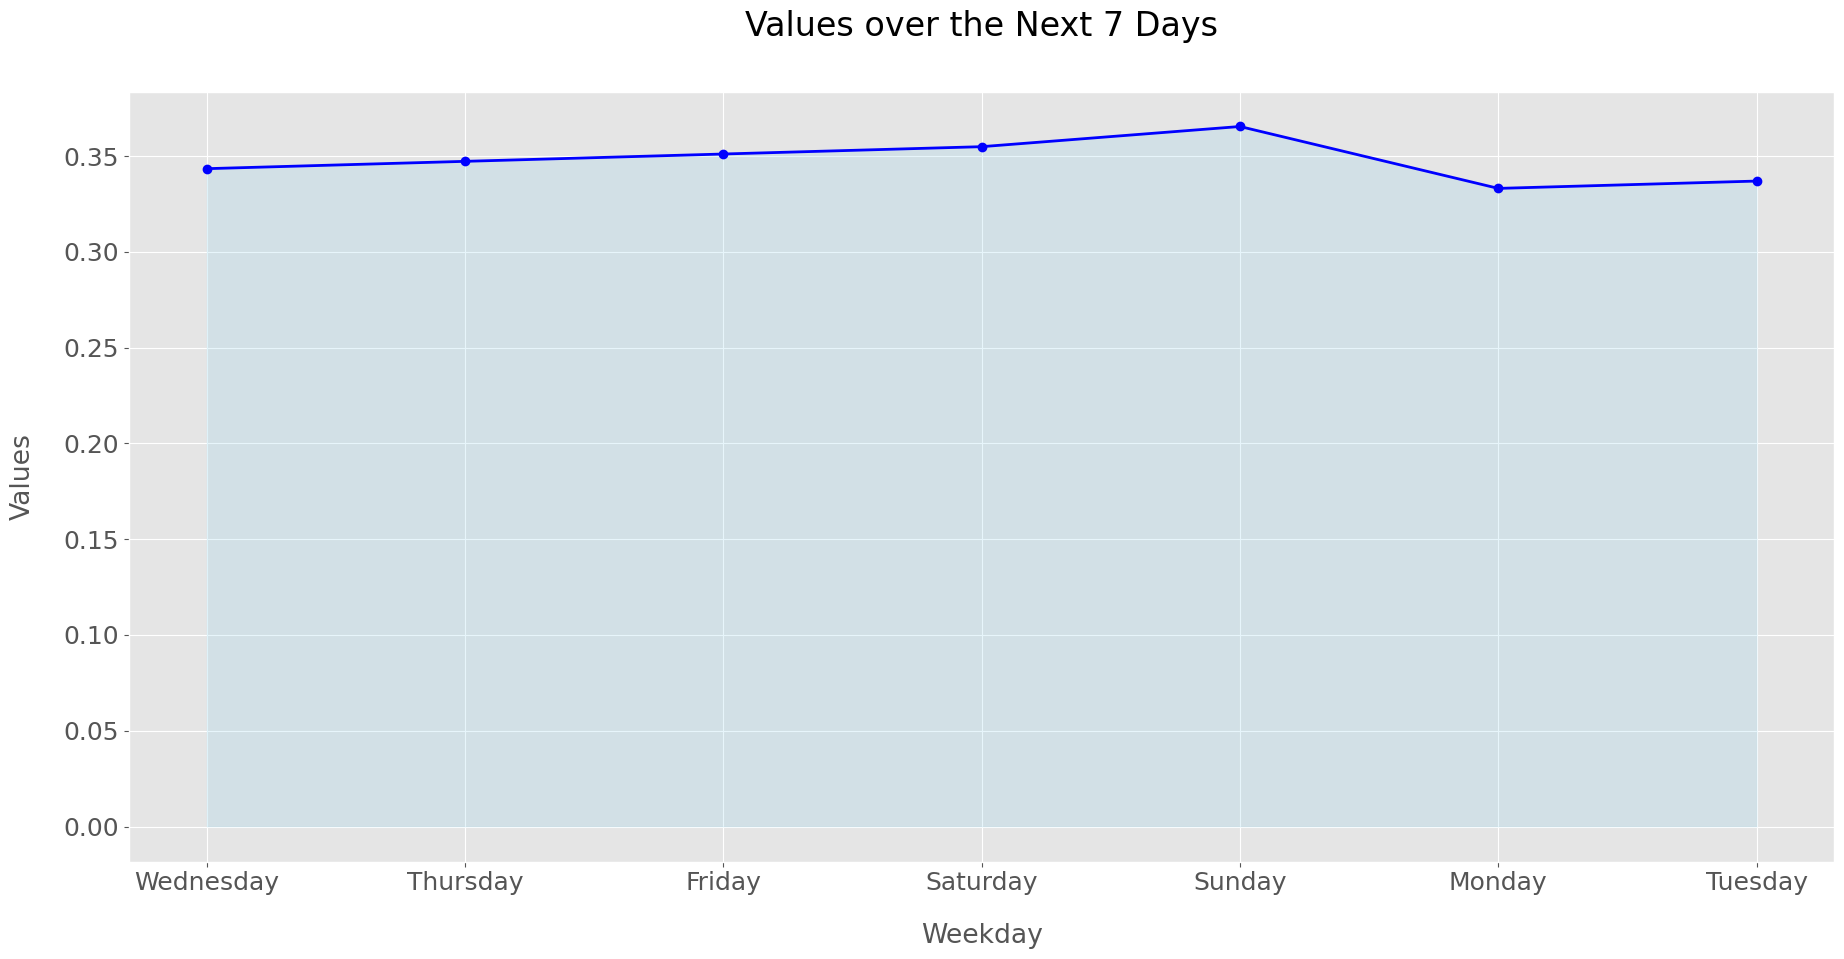

In [148]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(22,10))
plt.fill_between(weekdays, data, 0, color='skyblue', alpha=0.2)
plt.plot(weekdays, data, marker='o', color='blue', linewidth=2)

# Set the labels and title
plt.xlabel('Weekday',labelpad=20)
plt.ylabel('Values',labelpad=20)
plt.title('Values over the Next 7 Days',pad=40,fontsize=24)

# Set the font sizes for axis labels and ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Show the plot
plt.show()


In [149]:
#data for the previous week
import pandas as pd
from datetime import date, timedelta

# Calculate the start and end dates for the previous week
start_date = date.today() - timedelta(days=7)
end_date = date.today() - timedelta(days=1)

# Generate the DataFrame
x1_predict = pd.DataFrame(pd.date_range(start_date, end_date, freq='d'), columns=['Date'])

x1_predict['Day'] = x1_predict['Date'].dt.day
x1_predict['Workday_N'] = np.busday_count(
                x1_predict['Date'].values.astype('datetime64[M]'),
                x1_predict['Date'].values.astype('datetime64[D]'))
x1_predict['Week_day'] = x1_predict['Date'].dt.weekday
x1_predict['Week_of_month'] = (x1_predict['Date'].dt.day - 
                              x1_predict['Date'].dt.weekday - 2)//7+2
x1_predict['Weekday_order'] = (x1_predict['Date'].dt.day + 6) // 7
x1_predict['Month'] = x1_predict['Date'].dt.month
newdf = x1_predict.drop ("Date", axis='columns')
newdf
y_pred1 = model.predict(newdf[:7])


In [150]:
y_pred1

array([0.33374387, 0.33940714, 0.34507041, 0.35073368, 0.36174901,
       0.33312089, 0.33878416])

In [151]:
y_pred

array([0.33444629, 0.34010956, 0.34577283, 0.3514361 , 0.36245143,
       0.33382332, 0.33948658])

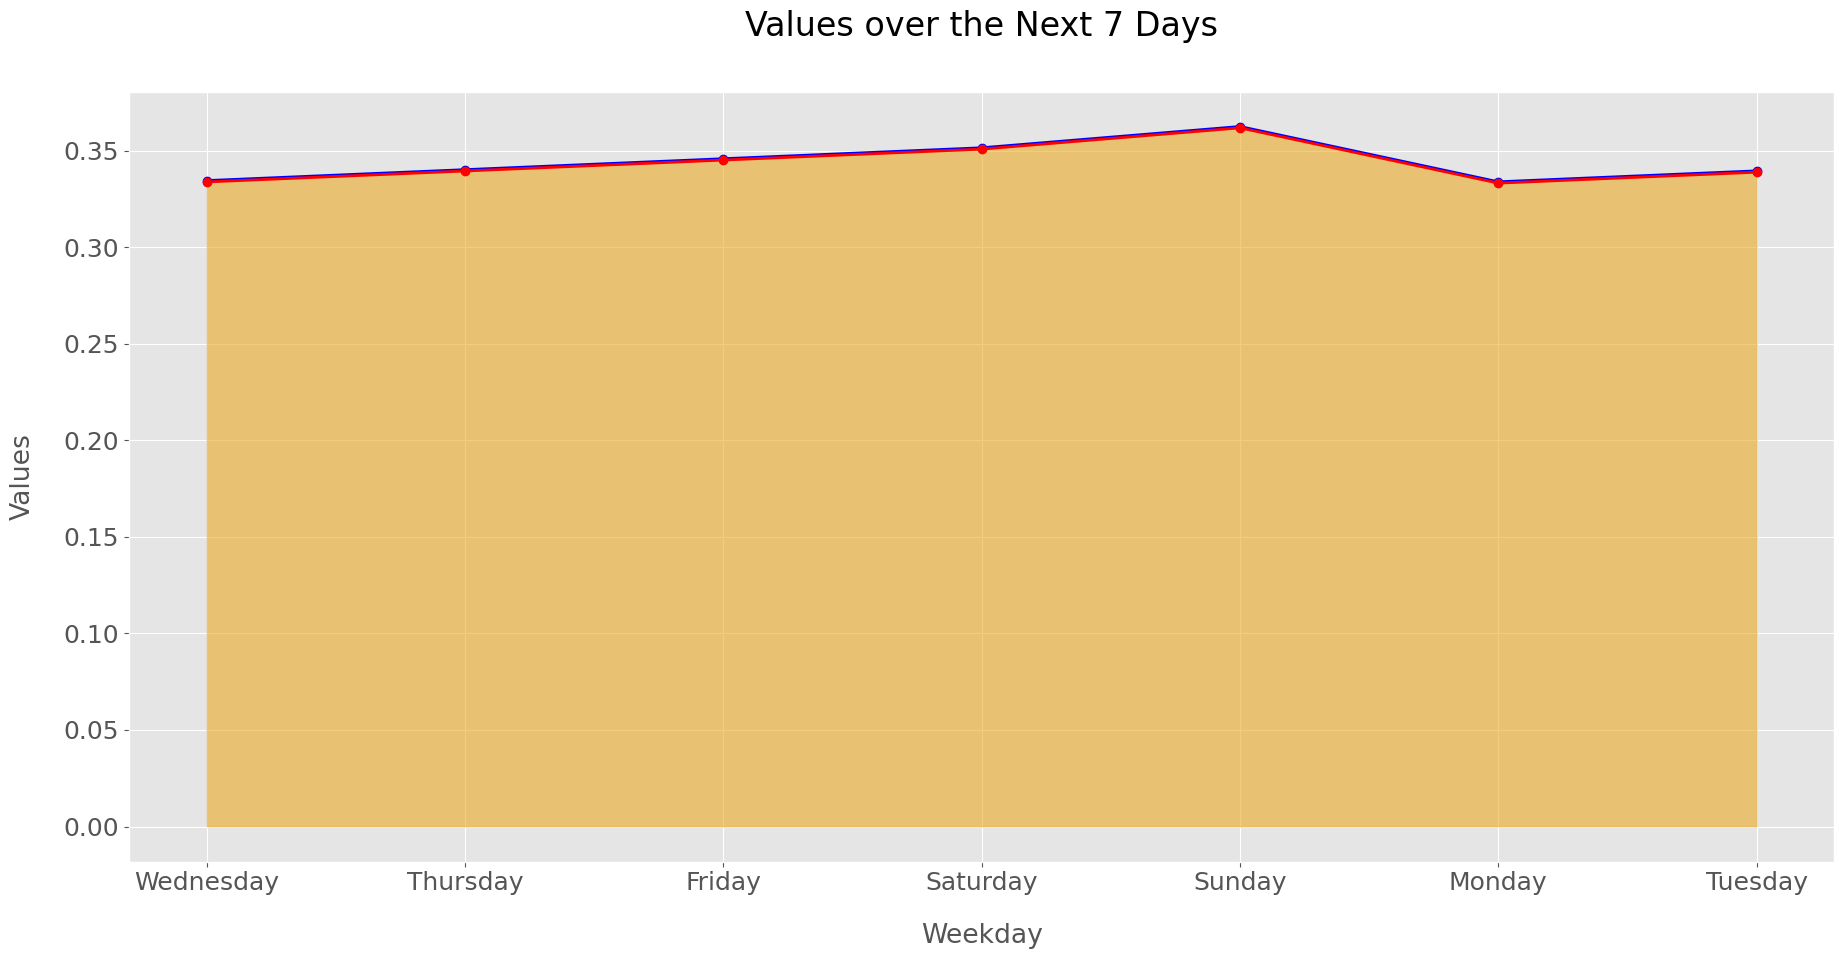

In [156]:
plt.figure(figsize=(22,10))
plt.fill_between(weekdays, y_pred, 0, color='skyblue', alpha=0.2, label='Current Week')
plt.plot(weekdays, y_pred, marker='o', color='blue', linewidth=2, label='Current Week')

# Plot data2
plt.fill_between(weekdays, y_pred1, 0, color='orange', alpha=0.5, label='Previous Week')
plt.plot(weekdays, y_pred1, marker='o', color='red', linewidth=2, label='Previous Week')

# Set the labels and title
plt.xlabel('Weekday', labelpad=20)
plt.ylabel('Values', labelpad=20)
plt.title('Values over the Next 7 Days', pad=40, fontsize=24)

# Set the font sizes for axis labels and ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


# Show the plot
plt.show()